In [1]:
import wave

import audioread

import scipy

from glob import glob

import os

import random

from librosa.display import waveplot

from scipy.io.wavfile import read
from scipy import vstack

from IPython.display import Audio

import librosa

import numpy as np

In [2]:
company_data_dir = './company_dataset/'

In [3]:
# random pick one file
wav_file_list = glob(os.path.join(company_data_dir, '*/*.wav'))

In [4]:
random.choice(wav_file_list)

'./company_dataset/C09034864463-C/C09034864463-C_5.wav'

In [210]:
def random_choose_from_dir(path, file_type='wav'):
    path = os.path.join(path, '*', f'*.{file_type}')
    # print(path)
    file_path = random.choice(glob(path))
    # print(file_path)
    return file_path

# test
random_choose_from_dir(company_data_dir)

'./company_dataset/C0742336059-C/C0742336059-C_1.wav'

In [145]:
Audio(random_choose_from_dir(company_data_dir))

./company_dataset/*/*.wav
./company_dataset/C09036278803-C/C09036278803-C_11.wav


In [146]:
JNAS_dir = './JNAS/WAVES_DT/'

In [147]:
Audio(random_choose_from_dir(JNAS_dir))

./JNAS/WAVES_DT/*/*.wav
./JNAS/WAVES_DT/M017/BM017F02_DT.wav


In [148]:
# random noise
Audio(random_choose_from_dir('./musan/music/'))

./musan/music/*/*.wav
./musan/music/hd-classical/music-hd-0022.wav


In [149]:
read(random_choose_from_dir(company_data_dir))

./company_dataset/*/*.wav
./company_dataset/C09011483550-C/C09011483550-C_6.wav


(8000, array([  -43,    18,   -67, ...,  -136, -3296, -1791], dtype=int16))

In [211]:
# read wav file
def read_wav(file_add):
    data, sr = librosa.load(file_add, sr=None)
    # print(f"SR:{sr}")
    return data

In [151]:
# test
read_wav(random_choose_from_dir(company_data_dir))

./company_dataset/*/*.wav
./company_dataset/C0743531282-C/C0743531282-C_21.wav
SR:8000


array([-0.22460938,  0.1565857 ,  0.50042725, ..., -0.00097656,
       -0.0050354 , -0.00253296], dtype=float32)

In [152]:
read_wav(random_choose_from_dir(JNAS_dir))

./JNAS/WAVES_DT/*/*.wav
./JNAS/WAVES_DT/M013/NM013018_DT.wav
SR:16000


array([ 1.5258789e-03,  1.5563965e-03,  1.4648438e-03, ...,
       -9.1552734e-05,  2.4414062e-04,  5.7983398e-04], dtype=float32)

In [153]:
# random read wav files from direcoty return numpy
def random_read_wav(data_dir):
    return read_wav(random_choose_from_dir(data_dir))

In [154]:
# test
random_read_wav(company_data_dir)

./company_dataset/*/*.wav
./company_dataset/C0743717771-O/C0743717771-O_3.wav
SR:8000


array([ 0.06140137,  0.03640747, -0.00088501, ...,  0.00036621,
       -0.00015259, -0.00222778], dtype=float32)

In [212]:
def combine_two_wavs(one, two):
    length = len(one)
    length2 = len(two)
    # print(f"origin: {length}")
    # print(f"noise: {len(two)}")
    if length2 > length:
        start = random.randint(0, length2 - length)
        return (one + two[start:start+length]) / 2
    else:
        return one[:length2] + two

In [213]:
# test combine
len(combine_two_wavs(random_read_wav(company_data_dir), random_read_wav('./musan/music/')))

32332

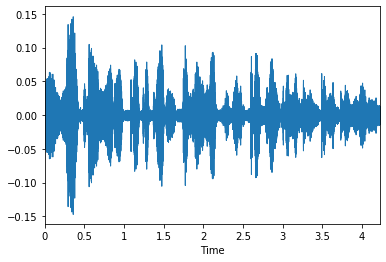

In [214]:
librosa.display.waveplot(random_read_wav(company_data_dir), sr=8000)

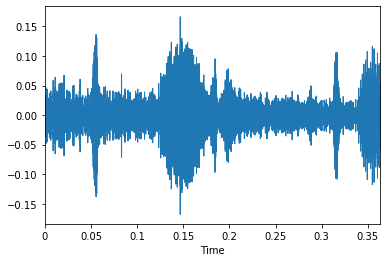

In [216]:
librosa.display.waveplot(combine_two_wavs(random_read_wav(company_data_dir), random_read_wav('./musan/music//')))

In [217]:
# listen to the mix files
Audio(combine_two_wavs(random_read_wav(company_data_dir), 0.08*random_read_wav('./musan/music/')), rate=8000)

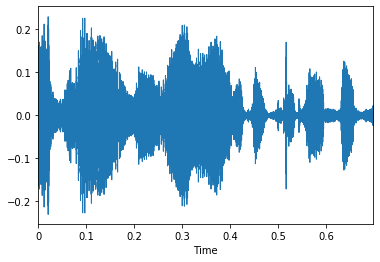

In [218]:
# compare to the original file and merged files wave
waveplot(combine_two_wavs(random_read_wav(company_data_dir), random_read_wav('./musan/speech/')))

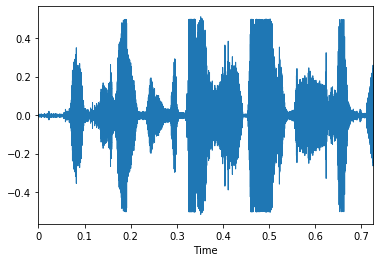

In [219]:
waveplot(combine_two_wavs(random_read_wav(company_data_dir), 0.08*random_read_wav('./musan/speech/')))

# Generate new noise combined data.
- [x] Before preprocessing like the way in Xvector in Kaldi.
    Prodduce the data and save in wav file, and then I don't need to modify the preprocessing code.
- [ ] While preprocessing in the code of preprocessing.py, and generate the npy file.
    I don't have to write another generate data code.

## steps of generate new data with noise.
```python
for every wavfile in dataset:
    new_file, noise_name = add_noise(wavfile)
    save_file = save_noise(new_file, wavfile.name+noise_name)
```

```python
def add_noise(wavfile, noise_directory):
    noise_type = random.choice(['music', 'speaker', 'noise'])
    noise_file = random_choose_from_dir(noise_directory+noise_type)
    _, wav_file = librosa.load(wavfile)
    _, noise_file = librosa.load(noise_file)
    data = combine_two_wavs(wavfile, noise_file)
    return data, noise_file
```

```python
def save_noise(data, file_name):
    return librosa.output.write_wav(file_name, data, 8000, norm=True)
```

In [220]:
# implement
def add_noise(wav_file, noise_dir):
    noise_type = random.choice(['music', 'noise', 'speech'])
    noise_dir = os.path.join(noise_dir, noise_type)
    noise_file = random_choose_from_dir(noise_dir)
    origin, _ = librosa.load(wav_file, sr=None)
    noise, _ = librosa.load(noise_file, sr=None)
    data = combine_two_wavs(origin, noise)
    return data, noise_type
# test
wav_file = './company_dataset/C0429026886-C/C0429026886-C_0.wav'
add_noise(wav_file, './musan/')

(array([0.10295105, 0.11488342, 0.12408447, ..., 0.0770874 , 0.10380554,
        0.05847168], dtype=float32), 'music')

In [204]:
%pdb

Automatic pdb calling has been turned OFF


In [208]:
from tqdm import tqdm_notebook

In [251]:
# draws
new_file, noise = add_noise(wav_file, './musan/')


/company_dataset/C0429026886-C/C0429026886-C_0_music.wav


In [252]:
for wav_file in tqdm_notebook(glob(company_data_dir+"/*/*.wav")):
    new_file, noise = add_noise(wav_file, './musan/')
    name = wav_file.strip(".wav")+f'_{noise}.wav'
    print(name)
    librosa.output.write_wav(f'./{name}', new_file, 8000)

/company_dataset/C0429026886-C/C0429026886-C_0_music.wav
/company_dataset/C0429026886-C/C0429026886-C_4_speech.wav
/company_dataset/C0429026886-C/C0429026886-C_6_noise.wav
/company_dataset/C0429026886-C/C0429026886-C_15_music.wav
/company_dataset/C0429026886-C/C0429026886-C_1_speech.wav
/company_dataset/C0429026886-C/C0429026886-C_9_noise.wav
/company_dataset/C0429026886-C/C0429026886-C_3_speech.wav
/company_dataset/C0429026886-C/C0429026886-C_2_noise.wav
/company_dataset/C0429026886-C/C0429026886-C_11_speech.wav
/company_dataset/C0429026886-C/C0429026886-C_5_noise.wav
/company_dataset/C0429026886-C/C0429026886-C_8_music.wav
/company_dataset/C0429026886-C/C0429026886-C_17_speech.wav
/company_dataset/C0429026886-C/C0429026886-C_7_noise.wav
/company_dataset/C0429026886-C/C0429026886-C_10_speech.wav
/company_dataset/C0429026886-C/C0429026886-C_12_noise.wav
/company_dataset/C0429026886-C/C0429026886-C_13_music.wav
/company_dataset/C0429026886-C/C0429026886-C_16_noise.wav
/company_dataset/C

/company_dataset/C07013093624-O/C07013093624-O_12_music.wav
/company_dataset/C07013093624-O/C07013093624-O_6_music.wav
/company_dataset/C07013093624-O/C07013093624-O_0_music.wav
/company_dataset/C07013093624-O/C07013093624-O_9_music.wav
/company_dataset/C07013093624-O/C07013093624-O_8_music.wav
/company_dataset/C07013093624-O/C07013093624-O_10_noise.wav
/company_dataset/C07013093624-O/C07013093624-O_4_speech.wav
/company_dataset/C07013093624-O/C07013093624-O_3_noise.wav
/company_dataset/C07013093624-O/C07013093624-O_5_speech.wav
/company_dataset/C07013093624-O/C07013093624-O_2_noise.wav
/company_dataset/C07013093624-O/C07013093624-O_1_noise.wav
/company_dataset/C07013093624-O/C07013093624-O_7_music.wav
/company_dataset/C07016000500-C/C07016000500-C_2_noise.wav
/company_dataset/C07016000500-C/C07016000500-C_16_speech.wav
/company_dataset/C07016000500-C/C07016000500-C_15_speech.wav
/company_dataset/C07016000500-C/C07016000500-C_12_noise.wav
/company_dataset/C07016000500-C/C07016000500-C_

/company_dataset/C07053424806-C/C07053424806-C_14_noise.wav
/company_dataset/C07053424806-C/C07053424806-C_27_noise.wav
/company_dataset/C07053424806-C/C07053424806-C_29_music.wav
/company_dataset/C07053424806-C/C07053424806-C_1_speech.wav
/company_dataset/C07053424806-C/C07053424806-C_22_music.wav
/company_dataset/C07053424806-C/C07053424806-C_26_speech.wav
/company_dataset/C07053424806-C/C07053424806-C_17_noise.wav
/company_dataset/C07053424806-C/C07053424806-C_20_music.wav
/company_dataset/C07053424806-C/C07053424806-C_0_speech.wav
/company_dataset/C07053424806-C/C07053424806-C_10_speech.wav
/company_dataset/C07053424806-C/C07053424806-C_6_noise.wav
/company_dataset/C07053424806-O/C07053424806-O_7_noise.wav
/company_dataset/C07053424806-O/C07053424806-O_9_noise.wav
/company_dataset/C07053424806-O/C07053424806-O_19_noise.wav
/company_dataset/C07053424806-O/C07053424806-O_6_music.wav
/company_dataset/C07053424806-O/C07053424806-O_26_noise.wav
/company_dataset/C07053424806-O/C070534248

/company_dataset/C0729705616-C/C0729705616-C_17_speech.wav
/company_dataset/C0729705616-C/C0729705616-C_5_music.wav
/company_dataset/C0729705616-C/C0729705616-C_22_music.wav
/company_dataset/C0729705616-C/C0729705616-C_23_noise.wav
/company_dataset/C0729705616-C/C0729705616-C_3_music.wav
/company_dataset/C0729705616-C/C0729705616-C_21_noise.wav
/company_dataset/C0729705616-C/C0729705616-C_4_noise.wav
/company_dataset/C0729705616-C/C0729705616-C_19_speech.wav
/company_dataset/C0729705616-C/C0729705616-C_11_speech.wav
/company_dataset/C0729705616-C/C0729705616-C_14_music.wav
/company_dataset/C0729705616-O/C0729705616-O_20_noise.wav
/company_dataset/C0729705616-O/C0729705616-O_19_music.wav
/company_dataset/C0729705616-O/C0729705616-O_11_speech.wav
/company_dataset/C0729705616-O/C0729705616-O_21_noise.wav
/company_dataset/C0729705616-O/C0729705616-O_13_noise.wav
/company_dataset/C0729705616-O/C0729705616-O_10_noise.wav
/company_dataset/C0729705616-O/C0729705616-O_12_music.wav
/company_data

/company_dataset/C0742202331-C/C0742202331-C_7_noise.wav
/company_dataset/C0742202331-C/C0742202331-C_26_speech.wav
/company_dataset/C0742202331-C/C0742202331-C_6_noise.wav
/company_dataset/C0742202331-C/C0742202331-C_12_speech.wav
/company_dataset/C0742202331-C/C0742202331-C_10_music.wav
/company_dataset/C0742202331-C/C0742202331-C_1_music.wav
/company_dataset/C0742202331-C/C0742202331-C_22_speech.wav
/company_dataset/C0742202331-C/C0742202331-C_8_noise.wav
/company_dataset/C0742202331-C/C0742202331-C_3_speech.wav
/company_dataset/C0742202331-C/C0742202331-C_17_speech.wav
/company_dataset/C0742202331-C/C0742202331-C_15_speech.wav
/company_dataset/C0742202331-C/C0742202331-C_24_noise.wav
/company_dataset/C0742202331-O/C0742202331-O_4_music.wav
/company_dataset/C0742202331-O/C0742202331-O_21_noise.wav
/company_dataset/C0742202331-O/C0742202331-O_22_music.wav
/company_dataset/C0742202331-O/C0742202331-O_12_noise.wav
/company_dataset/C0742202331-O/C0742202331-O_3_speech.wav
/company_datas

/company_dataset/C0742240071-C/C0742240071-C_20_music.wav
/company_dataset/C0742240071-C/C0742240071-C_1_noise.wav
/company_dataset/C0742240071-C/C0742240071-C_6_noise.wav
/company_dataset/C0742240071-C/C0742240071-C_18_noise.wav
/company_dataset/C0742240071-C/C0742240071-C_16_music.wav
/company_dataset/C0742240071-C/C0742240071-C_11_speech.wav
/company_dataset/C0742240071-C/C0742240071-C_23_noise.wav
/company_dataset/C0742240071-C/C0742240071-C_14_music.wav
/company_dataset/C0742240071-C/C0742240071-C_25_music.wav
/company_dataset/C0742240071-C/C0742240071-C_12_noise.wav
/company_dataset/C0742240071-C/C0742240071-C_26_noise.wav
/company_dataset/C0742240071-C/C0742240071-C_4_music.wav
/company_dataset/C0742240071-C/C0742240071-C_24_noise.wav
/company_dataset/C0742240071-C/C0742240071-C_21_music.wav
/company_dataset/C0742240071-C/C0742240071-C_8_music.wav
/company_dataset/C0742240071-C/C0742240071-C_15_noise.wav
/company_dataset/C0742240071-C/C0742240071-C_27_speech.wav
/company_dataset

/company_dataset/C0742250822-C/C0742250822-C_26_speech.wav
/company_dataset/C0742250822-C/C0742250822-C_21_speech.wav
/company_dataset/C0742250822-C/C0742250822-C_27_music.wav
/company_dataset/C0742250822-C/C0742250822-C_25_noise.wav
/company_dataset/C0742250822-C/C0742250822-C_2_speech.wav
/company_dataset/C0742250822-C/C0742250822-C_30_noise.wav
/company_dataset/C0742250822-C/C0742250822-C_3_music.wav
/company_dataset/C0742250822-C/C0742250822-C_33_music.wav
/company_dataset/C0742250822-C/C0742250822-C_19_noise.wav
/company_dataset/C0742250822-C/C0742250822-C_29_speech.wav
/company_dataset/C0742250822-C/C0742250822-C_6_music.wav
/company_dataset/C0742250822-C/C0742250822-C_11_noise.wav
/company_dataset/C0742250822-C/C0742250822-C_36_speech.wav
/company_dataset/C0742250822-C/C0742250822-C_18_speech.wav
/company_dataset/C0742250822-C/C0742250822-C_16_speech.wav
/company_dataset/C0742250822-C/C0742250822-C_20_speech.wav
/company_dataset/C0742250822-C/C0742250822-C_0_music.wav
/company_d

/company_dataset/C0742315008-C/C0742315008-C_10_music.wav
/company_dataset/C0742315008-C/C0742315008-C_19_speech.wav
/company_dataset/C0742315008-C/C0742315008-C_11_noise.wav
/company_dataset/C0742315008-C/C0742315008-C_9_music.wav
/company_dataset/C0742315008-C/C0742315008-C_5_speech.wav
/company_dataset/C0742315008-O/C0742315008-O_26_music.wav
/company_dataset/C0742315008-O/C0742315008-O_1_speech.wav
/company_dataset/C0742315008-O/C0742315008-O_12_noise.wav
/company_dataset/C0742315008-O/C0742315008-O_6_speech.wav
/company_dataset/C0742315008-O/C0742315008-O_20_music.wav
/company_dataset/C0742315008-O/C0742315008-O_13_music.wav
/company_dataset/C0742315008-O/C0742315008-O_10_speech.wav
/company_dataset/C0742315008-O/C0742315008-O_7_noise.wav
/company_dataset/C0742315008-O/C0742315008-O_22_noise.wav
/company_dataset/C0742315008-O/C0742315008-O_23_music.wav
/company_dataset/C0742315008-O/C0742315008-O_0_music.wav
/company_dataset/C0742315008-O/C0742315008-O_4_speech.wav
/company_datase

/company_dataset/C0742332078-O/C0742332078-O_32_speech.wav
/company_dataset/C0742332078-O/C0742332078-O_36_speech.wav
/company_dataset/C0742332078-O/C0742332078-O_34_music.wav
/company_dataset/C0742332078-O/C0742332078-O_4_noise.wav
/company_dataset/C0742332078-O/C0742332078-O_11_speech.wav
/company_dataset/C0742332078-O/C0742332078-O_7_noise.wav
/company_dataset/C0742332078-O/C0742332078-O_10_speech.wav
/company_dataset/C0742332078-O/C0742332078-O_31_speech.wav
/company_dataset/C0742332078-O/C0742332078-O_24_noise.wav
/company_dataset/C0742332078-O/C0742332078-O_5_speech.wav
/company_dataset/C0742332078-O/C0742332078-O_16_speech.wav
/company_dataset/C0742332078-O/C0742332078-O_39_noise.wav
/company_dataset/C0742332078-O/C0742332078-O_2_speech.wav
/company_dataset/C0742332078-O/C0742332078-O_14_music.wav
/company_dataset/C0742332078-O/C0742332078-O_9_speech.wav
/company_dataset/C0742332078-O/C0742332078-O_27_music.wav
/company_dataset/C0742332078-O/C0742332078-O_21_speech.wav
/company_

/company_dataset/C0742356083-O/C0742356083-O_0_noise.wav
/company_dataset/C0742356083-O/C0742356083-O_2_music.wav
/company_dataset/C0742356083-O/C0742356083-O_15_music.wav
/company_dataset/C0742356083-O/C0742356083-O_7_speech.wav
/company_dataset/C0742356083-O/C0742356083-O_10_music.wav
/company_dataset/C0742356083-O/C0742356083-O_8_noise.wav
/company_dataset/C0742356083-O/C0742356083-O_5_music.wav
/company_dataset/C0742356083-O/C0742356083-O_11_music.wav
/company_dataset/C0742356083-O/C0742356083-O_3_music.wav
/company_dataset/C0742356083-O/C0742356083-O_13_music.wav
/company_dataset/C0742356083-O/C0742356083-O_1_music.wav
/company_dataset/C0742356083-O/C0742356083-O_16_music.wav
/company_dataset/C0742356083-O/C0742356083-O_4_speech.wav
/company_dataset/C0742356083-O/C0742356083-O_12_music.wav
/company_dataset/C0742356083-O/C0742356083-O_9_noise.wav
/company_dataset/C0742356083-O/C0742356083-O_14_speech.wav
/company_dataset/C0742356083-O/C0742356083-O_17_music.wav
/company_dataset/C07

/company_dataset/C0742368515-O/C0742368515-O_10_music.wav
/company_dataset/C0742368515-O/C0742368515-O_16_noise.wav
/company_dataset/C0742368515-O/C0742368515-O_14_noise.wav
/company_dataset/C0742368515-O/C0742368515-O_7_noise.wav
/company_dataset/C0742371555-C/C0742371555-C_15_noise.wav
/company_dataset/C0742371555-C/C0742371555-C_5_music.wav
/company_dataset/C0742371555-C/C0742371555-C_11_music.wav
/company_dataset/C0742371555-C/C0742371555-C_7_speech.wav
/company_dataset/C0742371555-C/C0742371555-C_10_noise.wav
/company_dataset/C0742371555-C/C0742371555-C_1_speech.wav
/company_dataset/C0742371555-C/C0742371555-C_13_speech.wav
/company_dataset/C0742371555-C/C0742371555-C_9_speech.wav
/company_dataset/C0742371555-C/C0742371555-C_14_music.wav
/company_dataset/C0742371555-C/C0742371555-C_16_noise.wav
/company_dataset/C0742371555-C/C0742371555-C_4_noise.wav
/company_dataset/C0742371555-C/C0742371555-C_8_noise.wav
/company_dataset/C0742371555-C/C0742371555-C_12_music.wav
/company_dataset/

/company_dataset/C0742431663-C/C0742431663-C_15_music.wav
/company_dataset/C0742431663-C/C0742431663-C_3_music.wav
/company_dataset/C0742431663-C/C0742431663-C_22_speech.wav
/company_dataset/C0742431663-C/C0742431663-C_11_speech.wav
/company_dataset/C0742431663-C/C0742431663-C_7_speech.wav
/company_dataset/C0742431663-C/C0742431663-C_13_music.wav
/company_dataset/C0742431663-C/C0742431663-C_24_music.wav
/company_dataset/C0742431663-C/C0742431663-C_4_music.wav
/company_dataset/C0742431663-C/C0742431663-C_9_speech.wav
/company_dataset/C0742431663-C/C0742431663-C_16_music.wav
/company_dataset/C0742431663-C/C0742431663-C_23_noise.wav
/company_dataset/C0742431663-C/C0742431663-C_17_noise.wav
/company_dataset/C0742431663-C/C0742431663-C_18_speech.wav
/company_dataset/C0742431663-C/C0742431663-C_14_music.wav
/company_dataset/C0742431663-C/C0742431663-C_21_noise.wav
/company_dataset/C0742431663-C/C0742431663-C_0_music.wav
/company_dataset/C0742431663-C/C0742431663-C_2_noise.wav
/company_datase

/company_dataset/C0742433780-O/C0742433780-O_15_music.wav
/company_dataset/C0742433780-O/C0742433780-O_9_speech.wav
/company_dataset/C0742437233-C/C0742437233-C_2_noise.wav
/company_dataset/C0742437233-C/C0742437233-C_6_music.wav
/company_dataset/C0742437233-C/C0742437233-C_5_music.wav
/company_dataset/C0742437233-C/C0742437233-C_7_noise.wav
/company_dataset/C0742437233-C/C0742437233-C_3_speech.wav
/company_dataset/C0742437233-C/C0742437233-C_0_speech.wav
/company_dataset/C0742437233-C/C0742437233-C_8_speech.wav
/company_dataset/C0742437233-C/C0742437233-C_1_noise.wav
/company_dataset/C0742437233-C/C0742437233-C_4_noise.wav
/company_dataset/C0742437233-O/C0742437233-O_2_music.wav
/company_dataset/C0742437233-O/C0742437233-O_6_noise.wav
/company_dataset/C0742437233-O/C0742437233-O_3_noise.wav
/company_dataset/C0742437233-O/C0742437233-O_4_music.wav
/company_dataset/C0742437233-O/C0742437233-O_5_music.wav
/company_dataset/C0742437233-O/C0742437233-O_0_speech.wav
/company_dataset/C0742437

/company_dataset/C0742448225-C/C0742448225-C_43_speech.wav
/company_dataset/C0742448225-C/C0742448225-C_45_music.wav
/company_dataset/C0742448225-C/C0742448225-C_61_speech.wav
/company_dataset/C0742448225-C/C0742448225-C_59_speech.wav
/company_dataset/C0742448225-C/C0742448225-C_23_speech.wav
/company_dataset/C0742448225-C/C0742448225-C_12_noise.wav
/company_dataset/C0742448225-C/C0742448225-C_20_music.wav
/company_dataset/C0742448225-C/C0742448225-C_58_noise.wav
/company_dataset/C0742448225-C/C0742448225-C_44_speech.wav
/company_dataset/C0742448225-C/C0742448225-C_54_speech.wav
/company_dataset/C0742448225-C/C0742448225-C_24_speech.wav
/company_dataset/C0742448225-C/C0742448225-C_31_speech.wav
/company_dataset/C0742448225-C/C0742448225-C_51_speech.wav
/company_dataset/C0742448225-C/C0742448225-C_40_speech.wav
/company_dataset/C0742448225-C/C0742448225-C_11_music.wav
/company_dataset/C0742448225-C/C0742448225-C_18_speech.wav
/company_dataset/C0742448225-C/C0742448225-C_19_speech.wav
/c

/company_dataset/C0742452067-O/C0742452067-O_32_speech.wav
/company_dataset/C0742452067-O/C0742452067-O_34_speech.wav
/company_dataset/C0742452067-O/C0742452067-O_16_noise.wav
/company_dataset/C0742452067-O/C0742452067-O_14_noise.wav
/company_dataset/C0742452067-O/C0742452067-O_29_noise.wav
/company_dataset/C0742452067-O/C0742452067-O_20_speech.wav
/company_dataset/C0742452067-O/C0742452067-O_11_speech.wav
/company_dataset/C0742452067-O/C0742452067-O_1_music.wav
/company_dataset/C0742452067-O/C0742452067-O_0_noise.wav
/company_dataset/C0742452067-O/C0742452067-O_31_speech.wav
/company_dataset/C0742452067-O/C0742452067-O_2_music.wav
/company_dataset/C0742452067-O/C0742452067-O_10_speech.wav
/company_dataset/C0742452067-O/C0742452067-O_8_noise.wav
/company_dataset/C0742452067-O/C0742452067-O_26_speech.wav
/company_dataset/C0742452067-O/C0742452067-O_30_noise.wav
/company_dataset/C0742452067-O/C0742452067-O_25_music.wav
/company_dataset/C0742452067-O/C0742452067-O_18_music.wav
/company_da

/company_dataset/C0742456436-O/C0742456436-O_12_music.wav
/company_dataset/C0742456436-O/C0742456436-O_29_music.wav
/company_dataset/C0742456436-O/C0742456436-O_38_speech.wav
/company_dataset/C0742456436-O/C0742456436-O_39_speech.wav
/company_dataset/C0742456436-O/C0742456436-O_7_noise.wav
/company_dataset/C0742456436-O/C0742456436-O_33_music.wav
/company_dataset/C0742456436-O/C0742456436-O_36_noise.wav
/company_dataset/C0742456436-O/C0742456436-O_1_noise.wav
/company_dataset/C0742456436-O/C0742456436-O_8_music.wav
/company_dataset/C0742456436-O/C0742456436-O_19_noise.wav
/company_dataset/C0742456436-O/C0742456436-O_28_speech.wav
/company_dataset/C0742456436-O/C0742456436-O_26_speech.wav
/company_dataset/C0742456436-O/C0742456436-O_15_music.wav
/company_dataset/C0742456436-O/C0742456436-O_6_music.wav
/company_dataset/C0742456436-O/C0742456436-O_0_speech.wav
/company_dataset/C0742456436-O/C0742456436-O_37_noise.wav
/company_dataset/C0742456436-O/C0742456436-O_24_noise.wav
/company_datas

/company_dataset/C0742460156-O/C0742460156-O_2_speech.wav
/company_dataset/C0742460156-O/C0742460156-O_19_noise.wav
/company_dataset/C0742460156-O/C0742460156-O_9_noise.wav
/company_dataset/C0742460156-O/C0742460156-O_27_speech.wav
/company_dataset/C0742460156-O/C0742460156-O_5_noise.wav
/company_dataset/C0742460156-O/C0742460156-O_4_music.wav
/company_dataset/C0742460156-O/C0742460156-O_30_music.wav
/company_dataset/C0742460156-O/C0742460156-O_7_speech.wav
/company_dataset/C0742460156-O/C0742460156-O_13_speech.wav
/company_dataset/C0742464747-C/C0742464747-C_22_noise.wav
/company_dataset/C0742464747-C/C0742464747-C_12_speech.wav
/company_dataset/C0742464747-C/C0742464747-C_9_speech.wav
/company_dataset/C0742464747-C/C0742464747-C_27_noise.wav
/company_dataset/C0742464747-C/C0742464747-C_19_speech.wav
/company_dataset/C0742464747-C/C0742464747-C_25_speech.wav
/company_dataset/C0742464747-C/C0742464747-C_21_music.wav
/company_dataset/C0742464747-C/C0742464747-C_17_speech.wav
/company_da

/company_dataset/C0742466301-O/C0742466301-O_11_speech.wav
/company_dataset/C0742466301-O/C0742466301-O_10_noise.wav
/company_dataset/C0742466301-O/C0742466301-O_0_speech.wav
/company_dataset/C0742466301-O/C0742466301-O_7_music.wav
/company_dataset/C0742466301-O/C0742466301-O_12_music.wav
/company_dataset/C0742466301-O/C0742466301-O_6_noise.wav
/company_dataset/C0742466301-O/C0742466301-O_1_speech.wav
/company_dataset/C0742466301-O/C0742466301-O_21_noise.wav
/company_dataset/C0742466301-O/C0742466301-O_24_speech.wav
/company_dataset/C0742466301-O/C0742466301-O_16_noise.wav
/company_dataset/C0742466301-O/C0742466301-O_3_noise.wav
/company_dataset/C0742466301-O/C0742466301-O_13_noise.wav
/company_dataset/C0742466301-O/C0742466301-O_18_noise.wav
/company_dataset/C0742466301-O/C0742466301-O_25_speech.wav
/company_dataset/C0742466301-O/C0742466301-O_2_speech.wav
/company_dataset/C0742466301-O/C0742466301-O_14_music.wav
/company_dataset/C0742466301-O/C0742466301-O_19_music.wav
/company_datas

/company_dataset/C0742470382-C/C0742470382-C_36_speech.wav
/company_dataset/C0742470382-C/C0742470382-C_38_music.wav
/company_dataset/C0742470382-C/C0742470382-C_29_noise.wav
/company_dataset/C0742470382-C/C0742470382-C_1_noise.wav
/company_dataset/C0742470382-C/C0742470382-C_40_music.wav
/company_dataset/C0742470382-C/C0742470382-C_25_music.wav
/company_dataset/C0742470382-C/C0742470382-C_19_music.wav
/company_dataset/C0742470382-C/C0742470382-C_22_music.wav
/company_dataset/C0742470382-C/C0742470382-C_5_music.wav
/company_dataset/C0742470382-C/C0742470382-C_26_noise.wav
/company_dataset/C0742470382-C/C0742470382-C_42_speech.wav
/company_dataset/C0742470382-C/C0742470382-C_4_noise.wav
/company_dataset/C0742470382-C/C0742470382-C_24_music.wav
/company_dataset/C0742470382-C/C0742470382-C_7_noise.wav
/company_dataset/C0742470382-C/C0742470382-C_12_speech.wav
/company_dataset/C0742470382-C/C0742470382-C_44_speech.wav
/company_dataset/C0742470382-C/C0742470382-C_3_music.wav
/company_datase

/company_dataset/C0742471436-C/C0742471436-C_43_music.wav
/company_dataset/C0742471436-C/C0742471436-C_30_music.wav
/company_dataset/C0742471436-C/C0742471436-C_5_music.wav
/company_dataset/C0742471436-C/C0742471436-C_6_speech.wav
/company_dataset/C0742471436-C/C0742471436-C_46_music.wav
/company_dataset/C0742471436-C/C0742471436-C_31_noise.wav
/company_dataset/C0742471436-C/C0742471436-C_28_speech.wav
/company_dataset/C0742471436-C/C0742471436-C_36_noise.wav
/company_dataset/C0742471436-C/C0742471436-C_42_speech.wav
/company_dataset/C0742471436-C/C0742471436-C_24_music.wav
/company_dataset/C0742471436-C/C0742471436-C_37_noise.wav
/company_dataset/C0742471436-C/C0742471436-C_17_music.wav
/company_dataset/C0742471436-C/C0742471436-C_18_music.wav
/company_dataset/C0742471436-C/C0742471436-C_16_speech.wav
/company_dataset/C0742471436-C/C0742471436-C_33_noise.wav
/company_dataset/C0742471436-C/C0742471436-C_15_noise.wav
/company_dataset/C0742471436-C/C0742471436-C_2_music.wav
/company_data

/company_dataset/C0742471939-C/C0742471939-C_7_music.wav
/company_dataset/C0742471939-C/C0742471939-C_9_noise.wav
/company_dataset/C0742471939-C/C0742471939-C_11_speech.wav
/company_dataset/C0742471939-C/C0742471939-C_21_noise.wav
/company_dataset/C0742471939-C/C0742471939-C_25_speech.wav
/company_dataset/C0742471939-C/C0742471939-C_22_music.wav
/company_dataset/C0742471939-C/C0742471939-C_8_noise.wav
/company_dataset/C0742471939-C/C0742471939-C_13_music.wav
/company_dataset/C0742471939-C/C0742471939-C_23_speech.wav
/company_dataset/C0742471939-C/C0742471939-C_17_music.wav
/company_dataset/C0742471939-C/C0742471939-C_24_noise.wav
/company_dataset/C0742471939-C/C0742471939-C_26_speech.wav
/company_dataset/C0742471939-C/C0742471939-C_0_speech.wav
/company_dataset/C0742471939-C/C0742471939-C_18_noise.wav
/company_dataset/C0742471939-C/C0742471939-C_16_noise.wav
/company_dataset/C0742471939-C/C0742471939-C_1_speech.wav
/company_dataset/C0742471939-C/C0742471939-C_5_noise.wav
/company_datas

/company_dataset/C0742480248-C/C0742480248-C_19_music.wav
/company_dataset/C0742480248-C/C0742480248-C_27_music.wav
/company_dataset/C0742480248-C/C0742480248-C_2_noise.wav
/company_dataset/C0742480248-C/C0742480248-C_32_noise.wav
/company_dataset/C0742480248-C/C0742480248-C_8_noise.wav
/company_dataset/C0742480248-C/C0742480248-C_21_noise.wav
/company_dataset/C0742480248-C/C0742480248-C_23_speech.wav
/company_dataset/C0742480248-C/C0742480248-C_13_music.wav
/company_dataset/C0742480248-C/C0742480248-C_15_music.wav
/company_dataset/C0742480248-C/C0742480248-C_31_noise.wav
/company_dataset/C0742480248-C/C0742480248-C_12_speech.wav
/company_dataset/C0742480248-C/C0742480248-C_28_music.wav
/company_dataset/C0742480248-C/C0742480248-C_29_speech.wav
/company_dataset/C0742480248-C/C0742480248-C_16_noise.wav
/company_dataset/C0742480248-C/C0742480248-C_14_music.wav
/company_dataset/C0742480248-C/C0742480248-C_3_music.wav
/company_dataset/C0742480248-C/C0742480248-C_20_noise.wav
/company_datas

/company_dataset/C0742484091-O/C0742484091-O_22_music.wav
/company_dataset/C0742484091-O/C0742484091-O_11_noise.wav
/company_dataset/C0742484091-O/C0742484091-O_1_music.wav
/company_dataset/C0742484091-O/C0742484091-O_35_noise.wav
/company_dataset/C0742484091-O/C0742484091-O_40_speech.wav
/company_dataset/C0742493101-C/C0742493101-C_26_music.wav
/company_dataset/C0742493101-C/C0742493101-C_13_speech.wav
/company_dataset/C0742493101-C/C0742493101-C_24_noise.wav
/company_dataset/C0742493101-C/C0742493101-C_4_noise.wav
/company_dataset/C0742493101-C/C0742493101-C_22_speech.wav
/company_dataset/C0742493101-C/C0742493101-C_15_speech.wav
/company_dataset/C0742493101-C/C0742493101-C_18_music.wav
/company_dataset/C0742493101-C/C0742493101-C_23_music.wav
/company_dataset/C0742493101-C/C0742493101-C_19_noise.wav
/company_dataset/C0742493101-C/C0742493101-C_1_noise.wav
/company_dataset/C0742493101-C/C0742493101-C_6_noise.wav
/company_dataset/C0742493101-C/C0742493101-C_2_music.wav
/company_datase

/company_dataset/C0742518170-O/C0742518170-O_30_music.wav
/company_dataset/C0742518170-O/C0742518170-O_23_speech.wav
/company_dataset/C0742518170-O/C0742518170-O_29_noise.wav
/company_dataset/C0742518170-O/C0742518170-O_38_noise.wav
/company_dataset/C0742518170-O/C0742518170-O_2_music.wav
/company_dataset/C0742518170-O/C0742518170-O_19_noise.wav
/company_dataset/C0742518170-O/C0742518170-O_8_noise.wav
/company_dataset/C0742518170-O/C0742518170-O_41_music.wav
/company_dataset/C0742518170-O/C0742518170-O_7_speech.wav
/company_dataset/C0742518170-O/C0742518170-O_4_music.wav
/company_dataset/C0742518170-O/C0742518170-O_26_music.wav
/company_dataset/C0742518170-O/C0742518170-O_42_music.wav
/company_dataset/C0742518170-O/C0742518170-O_3_noise.wav
/company_dataset/C0742518170-O/C0742518170-O_6_noise.wav
/company_dataset/C0742518170-O/C0742518170-O_18_speech.wav
/company_dataset/C0742518170-O/C0742518170-O_16_music.wav
/company_dataset/C0742518170-O/C0742518170-O_36_music.wav
/company_dataset/

/company_dataset/C0742551181-C/C0742551181-C_14_speech.wav
/company_dataset/C0742551181-C/C0742551181-C_20_speech.wav
/company_dataset/C0742551181-C/C0742551181-C_39_music.wav
/company_dataset/C0742551181-C/C0742551181-C_6_noise.wav
/company_dataset/C0742551181-C/C0742551181-C_40_noise.wav
/company_dataset/C0742551181-C/C0742551181-C_31_speech.wav
/company_dataset/C0742551181-C/C0742551181-C_13_music.wav
/company_dataset/C0742551181-C/C0742551181-C_15_speech.wav
/company_dataset/C0742551181-C/C0742551181-C_3_noise.wav
/company_dataset/C0742551181-C/C0742551181-C_41_music.wav
/company_dataset/C0742551181-C/C0742551181-C_32_noise.wav
/company_dataset/C0742551181-C/C0742551181-C_0_speech.wav
/company_dataset/C0742551181-C/C0742551181-C_35_music.wav
/company_dataset/C0742551181-C/C0742551181-C_36_music.wav
/company_dataset/C0742551181-C/C0742551181-C_10_music.wav
/company_dataset/C0742551181-C/C0742551181-C_28_noise.wav
/company_dataset/C0742551181-C/C0742551181-C_22_noise.wav
/company_dat

/company_dataset/C0742557005-C/C0742557005-C_20_speech.wav
/company_dataset/C0742557005-C/C0742557005-C_1_speech.wav
/company_dataset/C0742557005-C/C0742557005-C_9_noise.wav
/company_dataset/C0742557005-C/C0742557005-C_30_noise.wav
/company_dataset/C0742557005-C/C0742557005-C_19_noise.wav
/company_dataset/C0742557005-C/C0742557005-C_17_speech.wav
/company_dataset/C0742557005-C/C0742557005-C_10_speech.wav
/company_dataset/C0742557005-C/C0742557005-C_28_noise.wav
/company_dataset/C0742557005-C/C0742557005-C_5_music.wav
/company_dataset/C0742557005-C/C0742557005-C_12_noise.wav
/company_dataset/C0742557005-C/C0742557005-C_25_speech.wav
/company_dataset/C0742557005-C/C0742557005-C_3_noise.wav
/company_dataset/C0742557005-C/C0742557005-C_27_speech.wav
/company_dataset/C0742557005-C/C0742557005-C_13_speech.wav
/company_dataset/C0742557005-C/C0742557005-C_22_speech.wav
/company_dataset/C0742557005-C/C0742557005-C_38_noise.wav
/company_dataset/C0742557005-C/C0742557005-C_33_noise.wav
/company_d

/company_dataset/C0742612701-C/C0742612701-C_40_speech.wav
/company_dataset/C0742612701-C/C0742612701-C_21_speech.wav
/company_dataset/C0742612701-C/C0742612701-C_4_noise.wav
/company_dataset/C0742612701-C/C0742612701-C_36_speech.wav
/company_dataset/C0742612701-C/C0742612701-C_8_speech.wav
/company_dataset/C0742612701-C/C0742612701-C_19_speech.wav
/company_dataset/C0742612701-C/C0742612701-C_5_music.wav
/company_dataset/C0742612701-C/C0742612701-C_15_music.wav
/company_dataset/C0742612701-C/C0742612701-C_7_noise.wav
/company_dataset/C0742612701-C/C0742612701-C_18_noise.wav
/company_dataset/C0742612701-C/C0742612701-C_31_speech.wav
/company_dataset/C0742612701-C/C0742612701-C_13_speech.wav
/company_dataset/C0742612701-C/C0742612701-C_32_noise.wav
/company_dataset/C0742612701-C/C0742612701-C_3_music.wav
/company_dataset/C0742612701-C/C0742612701-C_9_music.wav
/company_dataset/C0742612701-C/C0742612701-C_33_speech.wav
/company_dataset/C0742612701-C/C0742612701-C_22_speech.wav
/company_da

/company_dataset/C0742620153-O/C0742620153-O_15_speech.wav
/company_dataset/C0742620153-O/C0742620153-O_34_noise.wav
/company_dataset/C0742620153-O/C0742620153-O_14_music.wav
/company_dataset/C0742620153-O/C0742620153-O_13_noise.wav
/company_dataset/C0742620153-O/C0742620153-O_24_noise.wav
/company_dataset/C0742620153-O/C0742620153-O_8_noise.wav
/company_dataset/C0742620153-O/C0742620153-O_36_noise.wav
/company_dataset/C0742620153-O/C0742620153-O_31_music.wav
/company_dataset/C0742620153-O/C0742620153-O_40_music.wav
/company_dataset/C0742620153-O/C0742620153-O_27_speech.wav
/company_dataset/C0742620153-O/C0742620153-O_16_speech.wav
/company_dataset/C0742620153-O/C0742620153-O_12_speech.wav
/company_dataset/C0742620153-O/C0742620153-O_26_noise.wav
/company_dataset/C0742620153-O/C0742620153-O_5_music.wav
/company_dataset/C0742620153-O/C0742620153-O_4_noise.wav
/company_dataset/C0742620153-O/C0742620153-O_30_speech.wav
/company_dataset/C0742620153-O/C0742620153-O_33_speech.wav
/company_da

/company_dataset/C0742772864-C/C0742772864-C_15_music.wav
/company_dataset/C0742772864-C/C0742772864-C_26_noise.wav
/company_dataset/C0742772864-C/C0742772864-C_10_speech.wav
/company_dataset/C0742772864-C/C0742772864-C_11_noise.wav
/company_dataset/C0742772864-C/C0742772864-C_3_music.wav
/company_dataset/C0742772864-C/C0742772864-C_8_speech.wav
/company_dataset/C0742772864-C/C0742772864-C_14_noise.wav
/company_dataset/C0742772864-C/C0742772864-C_17_noise.wav
/company_dataset/C0742772864-C/C0742772864-C_7_speech.wav
/company_dataset/C0742772864-C/C0742772864-C_24_speech.wav
/company_dataset/C0742772864-C/C0742772864-C_23_noise.wav
/company_dataset/C0742772864-C/C0742772864-C_21_speech.wav
/company_dataset/C0742772864-C/C0742772864-C_5_noise.wav
/company_dataset/C0742772864-C/C0742772864-C_18_noise.wav
/company_dataset/C0742772864-C/C0742772864-C_12_music.wav
/company_dataset/C0742772864-C/C0742772864-C_1_speech.wav
/company_dataset/C0742772864-C/C0742772864-C_30_music.wav
/company_data

/company_dataset/C0743254894-C/C0743254894-C_11_speech.wav
/company_dataset/C0743254894-C/C0743254894-C_2_speech.wav
/company_dataset/C0743254894-C/C0743254894-C_10_noise.wav
/company_dataset/C0743254894-C/C0743254894-C_24_noise.wav
/company_dataset/C0743254894-O/C0743254894-O_11_music.wav
/company_dataset/C0743254894-O/C0743254894-O_6_speech.wav
/company_dataset/C0743254894-O/C0743254894-O_19_music.wav
/company_dataset/C0743254894-O/C0743254894-O_16_music.wav
/company_dataset/C0743254894-O/C0743254894-O_1_speech.wav
/company_dataset/C0743254894-O/C0743254894-O_3_speech.wav
/company_dataset/C0743254894-O/C0743254894-O_17_music.wav
/company_dataset/C0743254894-O/C0743254894-O_7_speech.wav
/company_dataset/C0743254894-O/C0743254894-O_15_music.wav
/company_dataset/C0743254894-O/C0743254894-O_35_speech.wav
/company_dataset/C0743254894-O/C0743254894-O_34_noise.wav
/company_dataset/C0743254894-O/C0743254894-O_31_music.wav
/company_dataset/C0743254894-O/C0743254894-O_24_speech.wav
/company_da

/company_dataset/C0743259109-C/C0743259109-C_7_noise.wav
/company_dataset/C0743259109-C/C0743259109-C_5_music.wav
/company_dataset/C0743259109-C/C0743259109-C_18_music.wav
/company_dataset/C0743259109-C/C0743259109-C_12_noise.wav
/company_dataset/C0743259109-C/C0743259109-C_26_music.wav
/company_dataset/C0743259109-C/C0743259109-C_13_music.wav
/company_dataset/C0743259109-C/C0743259109-C_1_speech.wav
/company_dataset/C0743259109-C/C0743259109-C_10_noise.wav
/company_dataset/C0743259109-C/C0743259109-C_16_speech.wav
/company_dataset/C0743259109-C/C0743259109-C_20_noise.wav
/company_dataset/C0743259109-C/C0743259109-C_27_music.wav
/company_dataset/C0743259109-C/C0743259109-C_15_speech.wav
/company_dataset/C0743259109-C/C0743259109-C_8_speech.wav
/company_dataset/C0743259109-C/C0743259109-C_19_noise.wav
/company_dataset/C0743259109-C/C0743259109-C_23_noise.wav
/company_dataset/C0743259109-C/C0743259109-C_4_noise.wav
/company_dataset/C0743259109-C/C0743259109-C_25_music.wav
/company_datase

/company_dataset/C0743524462-C/C0743524462-C_61_music.wav
/company_dataset/C0743524462-C/C0743524462-C_3_music.wav
/company_dataset/C0743524462-C/C0743524462-C_31_music.wav
/company_dataset/C0743524462-C/C0743524462-C_40_music.wav
/company_dataset/C0743524462-C/C0743524462-C_43_noise.wav
/company_dataset/C0743524462-C/C0743524462-C_1_noise.wav
/company_dataset/C0743524462-C/C0743524462-C_17_music.wav
/company_dataset/C0743524462-C/C0743524462-C_57_noise.wav
/company_dataset/C0743524462-C/C0743524462-C_56_noise.wav
/company_dataset/C0743524462-C/C0743524462-C_50_speech.wav
/company_dataset/C0743524462-C/C0743524462-C_37_noise.wav
/company_dataset/C0743524462-C/C0743524462-C_58_speech.wav
/company_dataset/C0743524462-C/C0743524462-C_36_music.wav
/company_dataset/C0743524462-C/C0743524462-C_9_noise.wav
/company_dataset/C0743524462-C/C0743524462-C_2_noise.wav
/company_dataset/C0743524462-C/C0743524462-C_48_music.wav
/company_dataset/C0743524462-C/C0743524462-C_18_noise.wav
/company_dataset

/company_dataset/C0743528891-C/C0743528891-C_3_speech.wav
/company_dataset/C0743528891-C/C0743528891-C_12_speech.wav
/company_dataset/C0743528891-C/C0743528891-C_24_speech.wav
/company_dataset/C0743528891-C/C0743528891-C_7_music.wav
/company_dataset/C0743528891-O/C0743528891-O_0_music.wav
/company_dataset/C0743528891-O/C0743528891-O_3_noise.wav
/company_dataset/C0743528891-O/C0743528891-O_5_noise.wav
/company_dataset/C0743528891-O/C0743528891-O_14_music.wav
/company_dataset/C0743528891-O/C0743528891-O_7_speech.wav
/company_dataset/C0743528891-O/C0743528891-O_9_music.wav
/company_dataset/C0743528891-O/C0743528891-O_8_speech.wav
/company_dataset/C0743528891-O/C0743528891-O_2_noise.wav
/company_dataset/C0743528891-O/C0743528891-O_1_noise.wav
/company_dataset/C0743528891-O/C0743528891-O_11_noise.wav
/company_dataset/C0743528891-O/C0743528891-O_12_speech.wav
/company_dataset/C0743528891-O/C0743528891-O_4_noise.wav
/company_dataset/C0743528891-O/C0743528891-O_10_music.wav
/company_dataset/C0

/company_dataset/C0743531282-C/C0743531282-C_18_music.wav
/company_dataset/C0743531282-C/C0743531282-C_57_noise.wav
/company_dataset/C0743531282-C/C0743531282-C_8_noise.wav
/company_dataset/C0743531282-C/C0743531282-C_48_music.wav
/company_dataset/C0743531282-C/C0743531282-C_16_music.wav
/company_dataset/C0743531282-C/C0743531282-C_23_speech.wav
/company_dataset/C0743531282-C/C0743531282-C_40_speech.wav
/company_dataset/C0743531282-C/C0743531282-C_70_speech.wav
/company_dataset/C0743531282-C/C0743531282-C_72_noise.wav
/company_dataset/C0743531282-C/C0743531282-C_2_music.wav
/company_dataset/C0743531282-C/C0743531282-C_28_speech.wav
/company_dataset/C0743531282-C/C0743531282-C_9_music.wav
/company_dataset/C0743531282-C/C0743531282-C_31_speech.wav
/company_dataset/C0743531282-C/C0743531282-C_49_speech.wav
/company_dataset/C0743531282-C/C0743531282-C_61_noise.wav
/company_dataset/C0743531282-C/C0743531282-C_10_noise.wav
/company_dataset/C0743531282-C/C0743531282-C_21_noise.wav
/company_da

/company_dataset/C0743532591-O/C0743532591-O_6_speech.wav
/company_dataset/C0743532591-O/C0743532591-O_18_speech.wav
/company_dataset/C0743532591-O/C0743532591-O_25_noise.wav
/company_dataset/C0743532591-O/C0743532591-O_3_music.wav
/company_dataset/C0743532591-O/C0743532591-O_21_speech.wav
/company_dataset/C0743532591-O/C0743532591-O_16_noise.wav
/company_dataset/C0743532591-O/C0743532591-O_9_music.wav
/company_dataset/C0743532591-O/C0743532591-O_22_music.wav
/company_dataset/C0743532591-O/C0743532591-O_24_music.wav
/company_dataset/C0743532591-O/C0743532591-O_26_music.wav
/company_dataset/C0743532591-O/C0743532591-O_19_noise.wav
/company_dataset/C0743532591-O/C0743532591-O_5_speech.wav
/company_dataset/C0743532591-O/C0743532591-O_8_speech.wav
/company_dataset/C0743532591-O/C0743532591-O_20_noise.wav
/company_dataset/C0743532591-O/C0743532591-O_0_noise.wav
/company_dataset/C0743532591-O/C0743532591-O_11_music.wav
/company_dataset/C0743532591-O/C0743532591-O_12_noise.wav
/company_datase

/company_dataset/C0743554234-C/C0743554234-C_5_speech.wav
/company_dataset/C0743554234-C/C0743554234-C_10_noise.wav
/company_dataset/C0743554234-O/C0743554234-O_4_speech.wav
/company_dataset/C0743554234-O/C0743554234-O_7_noise.wav
/company_dataset/C0743554234-O/C0743554234-O_5_music.wav
/company_dataset/C0743554234-O/C0743554234-O_9_noise.wav
/company_dataset/C0743554234-O/C0743554234-O_0_noise.wav
/company_dataset/C0743554234-O/C0743554234-O_11_speech.wav
/company_dataset/C0743554234-O/C0743554234-O_1_music.wav
/company_dataset/C0743554234-O/C0743554234-O_13_noise.wav
/company_dataset/C0743554234-O/C0743554234-O_10_music.wav
/company_dataset/C0743554234-O/C0743554234-O_6_music.wav
/company_dataset/C0743554234-O/C0743554234-O_8_speech.wav
/company_dataset/C0743554234-O/C0743554234-O_12_noise.wav
/company_dataset/C0743554234-O/C0743554234-O_2_music.wav
/company_dataset/C0743554234-O/C0743554234-O_3_music.wav
/company_dataset/C0743560421-C/C0743560421-C_3_noise.wav
/company_dataset/C0743

/company_dataset/C0743570038-C/C0743570038-C_36_speech.wav
/company_dataset/C0743570038-C/C0743570038-C_29_speech.wav
/company_dataset/C0743570038-C/C0743570038-C_6_speech.wav
/company_dataset/C0743570038-C/C0743570038-C_21_noise.wav
/company_dataset/C0743570038-C/C0743570038-C_19_music.wav
/company_dataset/C0743570038-C/C0743570038-C_18_music.wav
/company_dataset/C0743570038-C/C0743570038-C_31_noise.wav
/company_dataset/C0743570038-C/C0743570038-C_39_speech.wav
/company_dataset/C0743570038-C/C0743570038-C_33_noise.wav
/company_dataset/C0743570038-C/C0743570038-C_11_noise.wav
/company_dataset/C0743570038-C/C0743570038-C_5_speech.wav
/company_dataset/C0743570038-C/C0743570038-C_28_speech.wav
/company_dataset/C0743570038-C/C0743570038-C_24_music.wav
/company_dataset/C0743570038-C/C0743570038-C_4_noise.wav
/company_dataset/C0743570038-C/C0743570038-C_0_music.wav
/company_dataset/C0743570038-C/C0743570038-C_2_noise.wav
/company_dataset/C0743570038-O/C0743570038-O_28_speech.wav
/company_dat

/company_dataset/C0743620414-C/C0743620414-C_15_speech.wav
/company_dataset/C0743620414-C/C0743620414-C_24_noise.wav
/company_dataset/C0743620414-C/C0743620414-C_4_noise.wav
/company_dataset/C0743620414-C/C0743620414-C_7_noise.wav
/company_dataset/C0743620414-C/C0743620414-C_31_noise.wav
/company_dataset/C0743620414-C/C0743620414-C_6_noise.wav
/company_dataset/C0743620414-C/C0743620414-C_30_noise.wav
/company_dataset/C0743620414-C/C0743620414-C_8_noise.wav
/company_dataset/C0743620414-C/C0743620414-C_22_noise.wav
/company_dataset/C0743620414-C/C0743620414-C_20_noise.wav
/company_dataset/C0743620414-C/C0743620414-C_0_speech.wav
/company_dataset/C0743620414-C/C0743620414-C_9_speech.wav
/company_dataset/C0743620414-C/C0743620414-C_14_music.wav
/company_dataset/C0743620414-C/C0743620414-C_17_speech.wav
/company_dataset/C0743620414-C/C0743620414-C_12_noise.wav
/company_dataset/C0743620414-C/C0743620414-C_11_speech.wav
/company_dataset/C0743620414-C/C0743620414-C_26_noise.wav
/company_datase

/company_dataset/C0743627742-C/C0743627742-C_24_music.wav
/company_dataset/C0743627742-C/C0743627742-C_39_speech.wav
/company_dataset/C0743627742-C/C0743627742-C_11_speech.wav
/company_dataset/C0743627742-C/C0743627742-C_33_noise.wav
/company_dataset/C0743627742-C/C0743627742-C_4_speech.wav
/company_dataset/C0743627742-C/C0743627742-C_41_noise.wav
/company_dataset/C0743627742-C/C0743627742-C_25_noise.wav
/company_dataset/C0743627742-C/C0743627742-C_6_music.wav
/company_dataset/C0743627742-C/C0743627742-C_19_noise.wav
/company_dataset/C0743627742-C/C0743627742-C_16_music.wav
/company_dataset/C0743627742-C/C0743627742-C_1_music.wav
/company_dataset/C0743627742-C/C0743627742-C_27_noise.wav
/company_dataset/C0743627742-C/C0743627742-C_43_noise.wav
/company_dataset/C0743627742-C/C0743627742-C_21_speech.wav
/company_dataset/C0743627742-C/C0743627742-C_20_noise.wav
/company_dataset/C0743627742-C/C0743627742-C_13_noise.wav
/company_dataset/C0743627742-C/C0743627742-C_15_music.wav
/company_data

/company_dataset/C0743631779-C/C0743631779-C_13_speech.wav
/company_dataset/C0743631779-C/C0743631779-C_5_noise.wav
/company_dataset/C0743631779-C/C0743631779-C_10_speech.wav
/company_dataset/C0743631779-C/C0743631779-C_3_noise.wav
/company_dataset/C0743631779-C/C0743631779-C_31_speech.wav
/company_dataset/C0743631779-C/C0743631779-C_22_speech.wav
/company_dataset/C0743631779-C/C0743631779-C_30_music.wav
/company_dataset/C0743631779-C/C0743631779-C_21_music.wav
/company_dataset/C0743631779-C/C0743631779-C_8_speech.wav
/company_dataset/C0743631779-C/C0743631779-C_20_noise.wav
/company_dataset/C0743631779-C/C0743631779-C_19_music.wav
/company_dataset/C0743631779-C/C0743631779-C_24_music.wav
/company_dataset/C0743631779-C/C0743631779-C_16_music.wav
/company_dataset/C0743631779-C/C0743631779-C_28_music.wav
/company_dataset/C0743631779-C/C0743631779-C_17_speech.wav
/company_dataset/C0743631779-C/C0743631779-C_9_speech.wav
/company_dataset/C0743631779-C/C0743631779-C_29_speech.wav
/company_d

/company_dataset/C0743634518-C/C0743634518-C_23_speech.wav
/company_dataset/C0743634518-C/C0743634518-C_14_noise.wav
/company_dataset/C0743634518-C/C0743634518-C_19_speech.wav
/company_dataset/C0743634518-C/C0743634518-C_5_music.wav
/company_dataset/C0743634518-C/C0743634518-C_13_speech.wav
/company_dataset/C0743634518-C/C0743634518-C_20_noise.wav
/company_dataset/C0743634518-C/C0743634518-C_21_noise.wav
/company_dataset/C0743634518-O/C0743634518-O_11_noise.wav
/company_dataset/C0743634518-O/C0743634518-O_3_noise.wav
/company_dataset/C0743634518-O/C0743634518-O_24_speech.wav
/company_dataset/C0743634518-O/C0743634518-O_17_music.wav
/company_dataset/C0743634518-O/C0743634518-O_34_noise.wav
/company_dataset/C0743634518-O/C0743634518-O_13_noise.wav
/company_dataset/C0743634518-O/C0743634518-O_33_music.wav
/company_dataset/C0743634518-O/C0743634518-O_10_noise.wav
/company_dataset/C0743634518-O/C0743634518-O_21_music.wav
/company_dataset/C0743634518-O/C0743634518-O_31_speech.wav
/company_da

/company_dataset/C0743682330-C/C0743682330-C_27_music.wav
/company_dataset/C0743682330-C/C0743682330-C_9_speech.wav
/company_dataset/C0743682330-C/C0743682330-C_0_music.wav
/company_dataset/C0743682330-C/C0743682330-C_23_music.wav
/company_dataset/C0743682330-C/C0743682330-C_31_music.wav
/company_dataset/C0743682330-C/C0743682330-C_14_speech.wav
/company_dataset/C0743682330-C/C0743682330-C_24_noise.wav
/company_dataset/C0743682330-C/C0743682330-C_13_music.wav
/company_dataset/C0743682330-C/C0743682330-C_25_music.wav
/company_dataset/C0743682330-C/C0743682330-C_6_speech.wav
/company_dataset/C0743682330-C/C0743682330-C_8_speech.wav
/company_dataset/C0743682330-C/C0743682330-C_3_speech.wav
/company_dataset/C0743682330-C/C0743682330-C_5_noise.wav
/company_dataset/C0743682330-C/C0743682330-C_16_music.wav
/company_dataset/C0743682330-C/C0743682330-C_7_noise.wav
/company_dataset/C0743682330-C/C0743682330-C_28_speech.wav
/company_dataset/C0743682330-C/C0743682330-C_2_music.wav
/company_dataset

/company_dataset/C0743701530-O/C0743701530-O_26_speech.wav
/company_dataset/C0743701530-O/C0743701530-O_23_noise.wav
/company_dataset/C0743701530-O/C0743701530-O_14_music.wav
/company_dataset/C0743701530-O/C0743701530-O_4_music.wav
/company_dataset/C0743701530-O/C0743701530-O_15_noise.wav
/company_dataset/C0743701530-O/C0743701530-O_25_speech.wav
/company_dataset/C0743701530-O/C0743701530-O_29_music.wav
/company_dataset/C0743701530-O/C0743701530-O_13_music.wav
/company_dataset/C0743701530-O/C0743701530-O_6_speech.wav
/company_dataset/C0743701530-O/C0743701530-O_12_speech.wav
/company_dataset/C0743701530-O/C0743701530-O_34_speech.wav
/company_dataset/C0743701530-O/C0743701530-O_9_music.wav
/company_dataset/C0743701530-O/C0743701530-O_17_noise.wav
/company_dataset/C0743701530-O/C0743701530-O_18_noise.wav
/company_dataset/C0743701530-O/C0743701530-O_2_noise.wav
/company_dataset/C0743701530-O/C0743701530-O_28_speech.wav
/company_dataset/C0743701530-O/C0743701530-O_7_music.wav
/company_data

/company_dataset/C0743717771-C/C0743717771-C_14_noise.wav
/company_dataset/C0743717771-C/C0743717771-C_5_music.wav
/company_dataset/C0743717771-C/C0743717771-C_0_speech.wav
/company_dataset/C0743717771-C/C0743717771-C_2_speech.wav
/company_dataset/C0743717771-C/C0743717771-C_4_noise.wav
/company_dataset/C0743717771-C/C0743717771-C_13_music.wav
/company_dataset/C0743717771-O/C0743717771-O_10_noise.wav
/company_dataset/C0743717771-O/C0743717771-O_6_music.wav
/company_dataset/C0743717771-O/C0743717771-O_1_noise.wav
/company_dataset/C0743717771-O/C0743717771-O_15_noise.wav
/company_dataset/C0743717771-O/C0743717771-O_11_music.wav
/company_dataset/C0743717771-O/C0743717771-O_12_noise.wav
/company_dataset/C0743717771-O/C0743717771-O_0_speech.wav
/company_dataset/C0743717771-O/C0743717771-O_9_noise.wav
/company_dataset/C0743717771-O/C0743717771-O_5_music.wav
/company_dataset/C0743717771-O/C0743717771-O_4_noise.wav
/company_dataset/C0743717771-O/C0743717771-O_8_noise.wav
/company_dataset/C0743

/company_dataset/C0774226948-C/C0774226948-C_19_music.wav
/company_dataset/C0774226948-C/C0774226948-C_1_music.wav
/company_dataset/C0774226948-C/C0774226948-C_3_speech.wav
/company_dataset/C0774226948-C/C0774226948-C_8_music.wav
/company_dataset/C0774226948-C/C0774226948-C_12_music.wav
/company_dataset/C0774226948-C/C0774226948-C_10_speech.wav
/company_dataset/C0774226948-C/C0774226948-C_4_speech.wav
/company_dataset/C0774226948-C/C0774226948-C_0_speech.wav
/company_dataset/C0774226948-C/C0774226948-C_21_speech.wav
/company_dataset/C0774226948-C/C0774226948-C_20_speech.wav
/company_dataset/C0774226948-O/C0774226948-O_7_music.wav
/company_dataset/C0774226948-O/C0774226948-O_16_noise.wav
/company_dataset/C0774226948-O/C0774226948-O_17_speech.wav
/company_dataset/C0774226948-O/C0774226948-O_0_speech.wav
/company_dataset/C0774226948-O/C0774226948-O_15_music.wav
/company_dataset/C0774226948-O/C0774226948-O_13_speech.wav
/company_dataset/C0774226948-O/C0774226948-O_4_speech.wav
/company_dat

/company_dataset/C0774729095-O/C0774729095-O_1_speech.wav
/company_dataset/C0774729095-O/C0774729095-O_9_speech.wav
/company_dataset/C0774729095-O/C0774729095-O_14_music.wav
/company_dataset/C0774729095-O/C0774729095-O_11_noise.wav
/company_dataset/C0774729095-O/C0774729095-O_6_music.wav
/company_dataset/C0774729095-O/C0774729095-O_5_speech.wav
/company_dataset/C0774729095-O/C0774729095-O_8_music.wav
/company_dataset/C0774729095-O/C0774729095-O_12_music.wav
/company_dataset/C0774729095-O/C0774729095-O_2_music.wav
/company_dataset/C0774734637-C/C0774734637-C_2_music.wav
/company_dataset/C0774734637-C/C0774734637-C_8_speech.wav
/company_dataset/C0774734637-C/C0774734637-C_0_noise.wav
/company_dataset/C0774734637-C/C0774734637-C_1_music.wav
/company_dataset/C0774734637-C/C0774734637-C_14_speech.wav
/company_dataset/C0774734637-C/C0774734637-C_7_music.wav
/company_dataset/C0774734637-C/C0774734637-C_6_speech.wav
/company_dataset/C0774734637-C/C0774734637-C_9_speech.wav
/company_dataset/C07

/company_dataset/C08014189525-C/C08014189525-C_26_speech.wav
/company_dataset/C08014189525-C/C08014189525-C_6_speech.wav
/company_dataset/C08014189525-C/C08014189525-C_22_noise.wav
/company_dataset/C08014189525-C/C08014189525-C_11_noise.wav
/company_dataset/C08014189525-C/C08014189525-C_23_noise.wav
/company_dataset/C08014189525-C/C08014189525-C_17_noise.wav
/company_dataset/C08014189525-C/C08014189525-C_16_music.wav
/company_dataset/C08014189525-C/C08014189525-C_18_noise.wav
/company_dataset/C08014189525-C/C08014189525-C_4_music.wav
/company_dataset/C08014189525-C/C08014189525-C_24_noise.wav
/company_dataset/C08014189525-C/C08014189525-C_10_noise.wav
/company_dataset/C08014189525-C/C08014189525-C_0_music.wav
/company_dataset/C08014189525-C/C08014189525-C_5_music.wav
/company_dataset/C08014189525-C/C08014189525-C_13_music.wav
/company_dataset/C08014189525-C/C08014189525-C_12_speech.wav
/company_dataset/C08014189525-C/C08014189525-C_27_music.wav
/company_dataset/C08014189525-C/C08014189

/company_dataset/C08015152396-C/C08015152396-C_13_music.wav
/company_dataset/C08015152396-C/C08015152396-C_6_noise.wav
/company_dataset/C08015152396-C/C08015152396-C_3_music.wav
/company_dataset/C08015152396-C/C08015152396-C_26_speech.wav
/company_dataset/C08015152396-C/C08015152396-C_14_noise.wav
/company_dataset/C08015152396-C/C08015152396-C_22_noise.wav
/company_dataset/C08015152396-C/C08015152396-C_8_speech.wav
/company_dataset/C08015152396-O/C08015152396-O_15_speech.wav
/company_dataset/C08015152396-O/C08015152396-O_14_music.wav
/company_dataset/C08015152396-O/C08015152396-O_10_speech.wav
/company_dataset/C08015152396-O/C08015152396-O_9_speech.wav
/company_dataset/C08015152396-O/C08015152396-O_4_music.wav
/company_dataset/C08015152396-O/C08015152396-O_1_music.wav
/company_dataset/C08015152396-O/C08015152396-O_11_speech.wav
/company_dataset/C08015152396-O/C08015152396-O_12_noise.wav
/company_dataset/C08015152396-O/C08015152396-O_8_speech.wav
/company_dataset/C08015152396-O/C0801515

/company_dataset/C08026716953-C/C08026716953-C_9_speech.wav
/company_dataset/C08026716953-C/C08026716953-C_3_noise.wav
/company_dataset/C08026716953-C/C08026716953-C_15_noise.wav
/company_dataset/C08026716953-C/C08026716953-C_2_noise.wav
/company_dataset/C08026716953-C/C08026716953-C_0_music.wav
/company_dataset/C08026716953-C/C08026716953-C_1_music.wav
/company_dataset/C08026716953-C/C08026716953-C_6_music.wav
/company_dataset/C08026716953-C/C08026716953-C_20_speech.wav
/company_dataset/C08026716953-C/C08026716953-C_19_speech.wav
/company_dataset/C08026716953-C/C08026716953-C_10_music.wav
/company_dataset/C08026716953-C/C08026716953-C_4_speech.wav
/company_dataset/C08026716953-C/C08026716953-C_14_speech.wav
/company_dataset/C08026716953-C/C08026716953-C_18_speech.wav
/company_dataset/C08026716953-O/C08026716953-O_18_speech.wav
/company_dataset/C08026716953-O/C08026716953-O_5_speech.wav
/company_dataset/C08026716953-O/C08026716953-O_7_music.wav
/company_dataset/C08026716953-O/C08026716

/company_dataset/C08031140978-C/C08031140978-C_8_speech.wav
/company_dataset/C08031140978-C/C08031140978-C_14_music.wav
/company_dataset/C08031140978-C/C08031140978-C_4_music.wav
/company_dataset/C08031140978-C/C08031140978-C_1_noise.wav
/company_dataset/C08031140978-O/C08031140978-O_15_speech.wav
/company_dataset/C08031140978-O/C08031140978-O_16_music.wav
/company_dataset/C08031140978-O/C08031140978-O_4_speech.wav
/company_dataset/C08031140978-O/C08031140978-O_20_speech.wav
/company_dataset/C08031140978-O/C08031140978-O_1_speech.wav
/company_dataset/C08031140978-O/C08031140978-O_12_speech.wav
/company_dataset/C08031140978-O/C08031140978-O_9_noise.wav
/company_dataset/C08031140978-O/C08031140978-O_11_music.wav
/company_dataset/C08031140978-O/C08031140978-O_17_speech.wav
/company_dataset/C08031140978-O/C08031140978-O_10_music.wav
/company_dataset/C08031140978-O/C08031140978-O_5_speech.wav
/company_dataset/C08031140978-O/C08031140978-O_18_speech.wav
/company_dataset/C08031140978-O/C08031

/company_dataset/C08037778445-C/C08037778445-C_8_speech.wav
/company_dataset/C08037778445-C/C08037778445-C_7_music.wav
/company_dataset/C08037778445-C/C08037778445-C_12_noise.wav
/company_dataset/C08037778445-C/C08037778445-C_2_speech.wav
/company_dataset/C08037778445-C/C08037778445-C_16_music.wav
/company_dataset/C08037778445-C/C08037778445-C_4_noise.wav
/company_dataset/C08037778445-C/C08037778445-C_15_music.wav
/company_dataset/C08037778445-C/C08037778445-C_14_speech.wav
/company_dataset/C08037778445-C/C08037778445-C_1_music.wav
/company_dataset/C08037778445-C/C08037778445-C_20_noise.wav
/company_dataset/C08037778445-C/C08037778445-C_21_noise.wav
/company_dataset/C08037778445-C/C08037778445-C_5_noise.wav
/company_dataset/C08037778445-C/C08037778445-C_13_music.wav
/company_dataset/C08037778445-C/C08037778445-C_19_noise.wav
/company_dataset/C08037778445-C/C08037778445-C_24_music.wav
/company_dataset/C08037778445-C/C08037778445-C_9_speech.wav
/company_dataset/C08037778445-C/C0803777844

/company_dataset/C08038309694-O/C08038309694-O_6_speech.wav
/company_dataset/C08038309694-O/C08038309694-O_17_noise.wav
/company_dataset/C08038309694-O/C08038309694-O_7_music.wav
/company_dataset/C08038320921-C/C08038320921-C_11_noise.wav
/company_dataset/C08038320921-C/C08038320921-C_4_speech.wav
/company_dataset/C08038320921-C/C08038320921-C_2_speech.wav
/company_dataset/C08038320921-C/C08038320921-C_9_noise.wav
/company_dataset/C08038320921-C/C08038320921-C_12_speech.wav
/company_dataset/C08038320921-C/C08038320921-C_3_noise.wav
/company_dataset/C08038320921-C/C08038320921-C_6_music.wav
/company_dataset/C08038320921-C/C08038320921-C_13_speech.wav
/company_dataset/C08038320921-C/C08038320921-C_0_speech.wav
/company_dataset/C08038320921-C/C08038320921-C_1_noise.wav
/company_dataset/C08038320921-C/C08038320921-C_5_noise.wav
/company_dataset/C08038320921-C/C08038320921-C_14_noise.wav
/company_dataset/C08038320921-C/C08038320921-C_10_speech.wav
/company_dataset/C08038320921-C/C0803832092

/company_dataset/C08040284965-O/C08040284965-O_11_speech.wav
/company_dataset/C08053037350-C/C08053037350-C_1_music.wav
/company_dataset/C08053037350-C/C08053037350-C_8_speech.wav
/company_dataset/C08053037350-C/C08053037350-C_7_speech.wav
/company_dataset/C08053037350-C/C08053037350-C_9_speech.wav
/company_dataset/C08053037350-C/C08053037350-C_5_noise.wav
/company_dataset/C08053037350-C/C08053037350-C_0_noise.wav
/company_dataset/C08053037350-C/C08053037350-C_10_speech.wav
/company_dataset/C08053037350-C/C08053037350-C_11_music.wav
/company_dataset/C08053037350-C/C08053037350-C_6_music.wav
/company_dataset/C08053037350-C/C08053037350-C_3_noise.wav
/company_dataset/C08053037350-C/C08053037350-C_2_noise.wav
/company_dataset/C08053037350-C/C08053037350-C_4_speech.wav
/company_dataset/C08053037350-C/C08053037350-C_12_music.wav
/company_dataset/C08053037350-O/C08053037350-O_3_music.wav
/company_dataset/C08053037350-O/C08053037350-O_5_music.wav
/company_dataset/C08053037350-O/C08053037350-O

/company_dataset/C08061763225-C/C08061763225-C_11_speech.wav
/company_dataset/C08061763225-C/C08061763225-C_0_noise.wav
/company_dataset/C08061763225-O/C08061763225-O_6_noise.wav
/company_dataset/C08061763225-O/C08061763225-O_19_music.wav
/company_dataset/C08061763225-O/C08061763225-O_16_speech.wav
/company_dataset/C08061763225-O/C08061763225-O_4_music.wav
/company_dataset/C08061763225-O/C08061763225-O_13_speech.wav
/company_dataset/C08061763225-O/C08061763225-O_9_noise.wav
/company_dataset/C08061763225-O/C08061763225-O_11_music.wav
/company_dataset/C08061763225-O/C08061763225-O_1_music.wav
/company_dataset/C08061763225-O/C08061763225-O_8_speech.wav
/company_dataset/C08061763225-O/C08061763225-O_5_speech.wav
/company_dataset/C08061763225-O/C08061763225-O_18_music.wav
/company_dataset/C08061763225-O/C08061763225-O_21_speech.wav
/company_dataset/C08061763225-O/C08061763225-O_2_speech.wav
/company_dataset/C08061763225-O/C08061763225-O_3_noise.wav
/company_dataset/C08061763225-O/C080617632

/company_dataset/C08064076119-O/C08064076119-O_29_speech.wav
/company_dataset/C08064076119-O/C08064076119-O_9_music.wav
/company_dataset/C08064076119-O/C08064076119-O_34_music.wav
/company_dataset/C08064076119-O/C08064076119-O_33_speech.wav
/company_dataset/C08064076119-O/C08064076119-O_8_music.wav
/company_dataset/C08064076119-O/C08064076119-O_18_noise.wav
/company_dataset/C08064076119-O/C08064076119-O_36_speech.wav
/company_dataset/C08064076119-O/C08064076119-O_16_music.wav
/company_dataset/C08064076119-O/C08064076119-O_26_speech.wav
/company_dataset/C08064076119-O/C08064076119-O_30_music.wav
/company_dataset/C08064076119-O/C08064076119-O_1_speech.wav
/company_dataset/C08064076119-O/C08064076119-O_27_noise.wav
/company_dataset/C08064076119-O/C08064076119-O_21_speech.wav
/company_dataset/C08064076119-O/C08064076119-O_4_music.wav
/company_dataset/C08064076119-O/C08064076119-O_2_noise.wav
/company_dataset/C08064076119-O/C08064076119-O_14_noise.wav
/company_dataset/C08064076119-O/C080640

/company_dataset/C08083065757-O/C08083065757-O_17_speech.wav
/company_dataset/C08083065757-O/C08083065757-O_14_music.wav
/company_dataset/C08083065757-O/C08083065757-O_11_speech.wav
/company_dataset/C08083065757-O/C08083065757-O_1_music.wav
/company_dataset/C08083065757-O/C08083065757-O_15_noise.wav
/company_dataset/C08083065757-O/C08083065757-O_18_music.wav
/company_dataset/C08083065757-O/C08083065757-O_13_speech.wav
/company_dataset/C08083065757-O/C08083065757-O_4_music.wav
/company_dataset/C08083065757-O/C08083065757-O_16_music.wav
/company_dataset/C08083065757-O/C08083065757-O_2_speech.wav
/company_dataset/C08083065757-O/C08083065757-O_0_speech.wav
/company_dataset/C08083065757-O/C08083065757-O_23_noise.wav
/company_dataset/C08083065757-O/C08083065757-O_19_noise.wav
/company_dataset/C08083065757-O/C08083065757-O_21_noise.wav
/company_dataset/C08083065757-O/C08083065757-O_5_noise.wav
/company_dataset/C08083065757-O/C08083065757-O_20_music.wav
/company_dataset/C08083065757-O/C0808306

/company_dataset/C08091765145-O/C08091765145-O_31_speech.wav
/company_dataset/C08091765145-O/C08091765145-O_18_speech.wav
/company_dataset/C08091765145-O/C08091765145-O_24_noise.wav
/company_dataset/C08091765145-O/C08091765145-O_37_music.wav
/company_dataset/C08091765145-O/C08091765145-O_26_music.wav
/company_dataset/C08091765145-O/C08091765145-O_5_music.wav
/company_dataset/C08094417772-C/C08094417772-C_6_music.wav
/company_dataset/C08094417772-C/C08094417772-C_28_speech.wav
/company_dataset/C08094417772-C/C08094417772-C_15_noise.wav
/company_dataset/C08094417772-C/C08094417772-C_17_music.wav
/company_dataset/C08094417772-C/C08094417772-C_9_speech.wav
/company_dataset/C08094417772-C/C08094417772-C_8_speech.wav
/company_dataset/C08094417772-C/C08094417772-C_25_noise.wav
/company_dataset/C08094417772-C/C08094417772-C_11_speech.wav
/company_dataset/C08094417772-C/C08094417772-C_23_music.wav
/company_dataset/C08094417772-C/C08094417772-C_30_noise.wav
/company_dataset/C08094417772-C/C08094

/company_dataset/C09010773455-O/C09010773455-O_15_music.wav
/company_dataset/C09010773455-O/C09010773455-O_12_speech.wav
/company_dataset/C09010773455-O/C09010773455-O_2_speech.wav
/company_dataset/C09010773455-O/C09010773455-O_5_noise.wav
/company_dataset/C09010773455-O/C09010773455-O_1_noise.wav
/company_dataset/C09010773455-O/C09010773455-O_17_music.wav
/company_dataset/C09010773455-O/C09010773455-O_14_speech.wav
/company_dataset/C09010773455-O/C09010773455-O_4_music.wav
/company_dataset/C09011323767-C/C09011323767-C_2_music.wav
/company_dataset/C09011323767-C/C09011323767-C_11_speech.wav
/company_dataset/C09011323767-C/C09011323767-C_9_music.wav
/company_dataset/C09011323767-C/C09011323767-C_16_music.wav
/company_dataset/C09011323767-C/C09011323767-C_8_noise.wav
/company_dataset/C09011323767-C/C09011323767-C_10_noise.wav
/company_dataset/C09011323767-C/C09011323767-C_1_music.wav
/company_dataset/C09011323767-C/C09011323767-C_5_music.wav
/company_dataset/C09011323767-C/C09011323767-

/company_dataset/C09011441040-C/C09011441040-C_23_noise.wav
/company_dataset/C09011441040-C/C09011441040-C_5_music.wav
/company_dataset/C09011441040-C/C09011441040-C_4_speech.wav
/company_dataset/C09011441040-C/C09011441040-C_11_music.wav
/company_dataset/C09011441040-C/C09011441040-C_18_music.wav
/company_dataset/C09011441040-C/C09011441040-C_16_music.wav
/company_dataset/C09011441040-C/C09011441040-C_0_music.wav
/company_dataset/C09011441040-C/C09011441040-C_21_speech.wav
/company_dataset/C09011441040-C/C09011441040-C_13_noise.wav
/company_dataset/C09011441040-C/C09011441040-C_19_speech.wav
/company_dataset/C09011441040-C/C09011441040-C_8_speech.wav
/company_dataset/C09011441040-C/C09011441040-C_1_music.wav
/company_dataset/C09011441040-C/C09011441040-C_10_speech.wav
/company_dataset/C09011441040-C/C09011441040-C_15_noise.wav
/company_dataset/C09011441040-C/C09011441040-C_12_noise.wav
/company_dataset/C09011441040-C/C09011441040-C_14_speech.wav
/company_dataset/C09011441040-C/C090114

/company_dataset/C09011518771-C/C09011518771-C_15_music.wav
/company_dataset/C09011518771-C/C09011518771-C_12_speech.wav
/company_dataset/C09011518771-C/C09011518771-C_3_music.wav
/company_dataset/C09011518771-C/C09011518771-C_8_speech.wav
/company_dataset/C09011518771-C/C09011518771-C_6_music.wav
/company_dataset/C09011518771-C/C09011518771-C_16_noise.wav
/company_dataset/C09011518771-C/C09011518771-C_19_speech.wav
/company_dataset/C09011518771-C/C09011518771-C_10_noise.wav
/company_dataset/C09011518771-C/C09011518771-C_1_speech.wav
/company_dataset/C09011518771-C/C09011518771-C_20_music.wav
/company_dataset/C09011518771-C/C09011518771-C_14_speech.wav
/company_dataset/C09011518771-C/C09011518771-C_4_noise.wav
/company_dataset/C09011518771-O/C09011518771-O_11_noise.wav
/company_dataset/C09011518771-O/C09011518771-O_13_speech.wav
/company_dataset/C09011518771-O/C09011518771-O_19_music.wav
/company_dataset/C09011518771-O/C09011518771-O_16_speech.wav
/company_dataset/C09011518771-O/C09011

/company_dataset/C09011525881-C/C09011525881-C_14_noise.wav
/company_dataset/C09011525881-C/C09011525881-C_15_speech.wav
/company_dataset/C09011525881-O/C09011525881-O_1_noise.wav
/company_dataset/C09011525881-O/C09011525881-O_9_noise.wav
/company_dataset/C09011525881-O/C09011525881-O_12_noise.wav
/company_dataset/C09011525881-O/C09011525881-O_7_noise.wav
/company_dataset/C09011525881-O/C09011525881-O_6_noise.wav
/company_dataset/C09011525881-O/C09011525881-O_10_music.wav
/company_dataset/C09011525881-O/C09011525881-O_2_speech.wav
/company_dataset/C09011525881-O/C09011525881-O_4_speech.wav
/company_dataset/C09011525881-O/C09011525881-O_14_noise.wav
/company_dataset/C09011525881-O/C09011525881-O_11_noise.wav
/company_dataset/C09011525881-O/C09011525881-O_5_noise.wav
/company_dataset/C09011525881-O/C09011525881-O_15_music.wav
/company_dataset/C09011525881-O/C09011525881-O_3_speech.wav
/company_dataset/C09011525881-O/C09011525881-O_13_music.wav
/company_dataset/C09011525881-O/C09011525881

/company_dataset/C09014454647-C/C09014454647-C_20_speech.wav
/company_dataset/C09014454647-C/C09014454647-C_19_speech.wav
/company_dataset/C09014454647-C/C09014454647-C_4_speech.wav
/company_dataset/C09014454647-C/C09014454647-C_3_noise.wav
/company_dataset/C09014454647-C/C09014454647-C_2_music.wav
/company_dataset/C09014454647-C/C09014454647-C_1_music.wav
/company_dataset/C09014454647-C/C09014454647-C_7_music.wav
/company_dataset/C09014454647-C/C09014454647-C_10_speech.wav
/company_dataset/C09014454647-C/C09014454647-C_21_noise.wav
/company_dataset/C09014454647-C/C09014454647-C_11_speech.wav
/company_dataset/C09014454647-C/C09014454647-C_16_speech.wav
/company_dataset/C09014454647-C/C09014454647-C_0_speech.wav
/company_dataset/C09014454647-C/C09014454647-C_14_noise.wav
/company_dataset/C09014454647-C/C09014454647-C_8_music.wav
/company_dataset/C09014454647-C/C09014454647-C_22_speech.wav
/company_dataset/C09014454647-C/C09014454647-C_23_speech.wav
/company_dataset/C09014454647-C/C09014

/company_dataset/C09015849451-O/C09015849451-O_20_noise.wav
/company_dataset/C09015849451-O/C09015849451-O_9_music.wav
/company_dataset/C09015849451-O/C09015849451-O_22_music.wav
/company_dataset/C09015849451-O/C09015849451-O_0_speech.wav
/company_dataset/C09015849451-O/C09015849451-O_19_speech.wav
/company_dataset/C09015849451-O/C09015849451-O_17_noise.wav
/company_dataset/C09015849451-O/C09015849451-O_16_music.wav
/company_dataset/C09015849451-O/C09015849451-O_21_music.wav
/company_dataset/C09015849451-O/C09015849451-O_7_speech.wav
/company_dataset/C09015849451-O/C09015849451-O_15_noise.wav
/company_dataset/C09015879595-C/C09015879595-C_0_noise.wav
/company_dataset/C09015879595-C/C09015879595-C_2_music.wav
/company_dataset/C09015879595-C/C09015879595-C_3_speech.wav
/company_dataset/C09015879595-C/C09015879595-C_1_noise.wav
/company_dataset/C09015879595-O/C09015879595-O_8_music.wav
/company_dataset/C09015879595-O/C09015879595-O_7_music.wav
/company_dataset/C09015879595-O/C09015879595-

/company_dataset/C09017450131-C/C09017450131-C_10_music.wav
/company_dataset/C09017450131-C/C09017450131-C_11_speech.wav
/company_dataset/C09017450131-C/C09017450131-C_15_music.wav
/company_dataset/C09017450131-C/C09017450131-C_9_speech.wav
/company_dataset/C09017450131-C/C09017450131-C_12_music.wav
/company_dataset/C09017450131-C/C09017450131-C_18_music.wav
/company_dataset/C09017450131-C/C09017450131-C_13_speech.wav
/company_dataset/C09017450131-C/C09017450131-C_6_noise.wav
/company_dataset/C09017450131-O/C09017450131-O_11_noise.wav
/company_dataset/C09017450131-O/C09017450131-O_2_music.wav
/company_dataset/C09017450131-O/C09017450131-O_5_speech.wav
/company_dataset/C09017450131-O/C09017450131-O_13_speech.wav
/company_dataset/C09017450131-O/C09017450131-O_16_noise.wav
/company_dataset/C09017450131-O/C09017450131-O_17_noise.wav
/company_dataset/C09017450131-O/C09017450131-O_9_speech.wav
/company_dataset/C09017450131-O/C09017450131-O_10_noise.wav
/company_dataset/C09017450131-O/C090174

/company_dataset/C09019030139-C/C09019030139-C_21_speech.wav
/company_dataset/C09019030139-C/C09019030139-C_25_music.wav
/company_dataset/C09019030139-C/C09019030139-C_12_music.wav
/company_dataset/C09019030139-C/C09019030139-C_3_noise.wav
/company_dataset/C09019030139-C/C09019030139-C_0_noise.wav
/company_dataset/C09019030139-C/C09019030139-C_23_speech.wav
/company_dataset/C09019030139-C/C09019030139-C_20_music.wav
/company_dataset/C09019030139-C/C09019030139-C_11_music.wav
/company_dataset/C09019030139-C/C09019030139-C_2_speech.wav
/company_dataset/C09019030139-C/C09019030139-C_4_speech.wav
/company_dataset/C09019030139-C/C09019030139-C_29_noise.wav
/company_dataset/C09019030139-C/C09019030139-C_16_noise.wav
/company_dataset/C09019030139-C/C09019030139-C_8_speech.wav
/company_dataset/C09019030139-C/C09019030139-C_30_music.wav
/company_dataset/C09019030139-C/C09019030139-C_5_music.wav
/company_dataset/C09019030139-C/C09019030139-C_24_speech.wav
/company_dataset/C09019030139-C/C0901903

/company_dataset/C09019106575-C/C09019106575-C_10_music.wav
/company_dataset/C09019106575-C/C09019106575-C_7_speech.wav
/company_dataset/C09019106575-C/C09019106575-C_5_noise.wav
/company_dataset/C09019106575-O/C09019106575-O_13_speech.wav
/company_dataset/C09019106575-O/C09019106575-O_22_speech.wav
/company_dataset/C09019106575-O/C09019106575-O_28_speech.wav
/company_dataset/C09019106575-O/C09019106575-O_26_music.wav
/company_dataset/C09019106575-O/C09019106575-O_1_noise.wav
/company_dataset/C09019106575-O/C09019106575-O_21_music.wav
/company_dataset/C09019106575-O/C09019106575-O_15_noise.wav
/company_dataset/C09019106575-O/C09019106575-O_6_noise.wav
/company_dataset/C09019106575-O/C09019106575-O_11_music.wav
/company_dataset/C09019106575-O/C09019106575-O_8_music.wav
/company_dataset/C09019106575-O/C09019106575-O_19_noise.wav
/company_dataset/C09019106575-O/C09019106575-O_0_speech.wav
/company_dataset/C09019106575-O/C09019106575-O_7_noise.wav
/company_dataset/C09019106575-O/C090191065

/company_dataset/C09032679181-O/C09032679181-O_9_speech.wav
/company_dataset/C09032679181-O/C09032679181-O_26_music.wav
/company_dataset/C09032679181-O/C09032679181-O_13_speech.wav
/company_dataset/C09032679181-O/C09032679181-O_15_speech.wav
/company_dataset/C09032679181-O/C09032679181-O_8_speech.wav
/company_dataset/C09032679181-O/C09032679181-O_0_noise.wav
/company_dataset/C09032679181-O/C09032679181-O_18_speech.wav
/company_dataset/C09032679181-O/C09032679181-O_23_noise.wav
/company_dataset/C09032679181-O/C09032679181-O_17_speech.wav
/company_dataset/C09032679181-O/C09032679181-O_21_noise.wav
/company_dataset/C09032688696-C/C09032688696-C_16_music.wav
/company_dataset/C09032688696-C/C09032688696-C_12_music.wav
/company_dataset/C09032688696-C/C09032688696-C_1_music.wav
/company_dataset/C09032688696-C/C09032688696-C_18_speech.wav
/company_dataset/C09032688696-C/C09032688696-C_17_speech.wav
/company_dataset/C09032688696-C/C09032688696-C_2_music.wav
/company_dataset/C09032688696-C/C0903

/company_dataset/C09032733515-C/C09032733515-C_52_speech.wav
/company_dataset/C09032733515-C/C09032733515-C_40_noise.wav
/company_dataset/C09032733515-C/C09032733515-C_23_speech.wav
/company_dataset/C09032733515-C/C09032733515-C_0_noise.wav
/company_dataset/C09032733515-C/C09032733515-C_18_noise.wav
/company_dataset/C09032733515-C/C09032733515-C_21_speech.wav
/company_dataset/C09032733515-C/C09032733515-C_54_noise.wav
/company_dataset/C09032733515-C/C09032733515-C_27_music.wav
/company_dataset/C09032733515-C/C09032733515-C_45_speech.wav
/company_dataset/C09032733515-C/C09032733515-C_56_noise.wav
/company_dataset/C09032733515-O/C09032733515-O_36_music.wav
/company_dataset/C09032733515-O/C09032733515-O_24_noise.wav
/company_dataset/C09032733515-O/C09032733515-O_6_speech.wav
/company_dataset/C09032733515-O/C09032733515-O_20_speech.wav
/company_dataset/C09032733515-O/C09032733515-O_25_speech.wav
/company_dataset/C09032733515-O/C09032733515-O_31_music.wav
/company_dataset/C09032733515-O/C09

/company_dataset/C09032839577-O/C09032839577-O_26_speech.wav
/company_dataset/C09032839577-O/C09032839577-O_11_music.wav
/company_dataset/C09032839577-O/C09032839577-O_10_speech.wav
/company_dataset/C09032839577-O/C09032839577-O_9_music.wav
/company_dataset/C09032839577-O/C09032839577-O_23_noise.wav
/company_dataset/C09032839577-O/C09032839577-O_17_music.wav
/company_dataset/C09032839577-O/C09032839577-O_20_noise.wav
/company_dataset/C09032839577-O/C09032839577-O_25_speech.wav
/company_dataset/C09032839577-O/C09032839577-O_14_noise.wav
/company_dataset/C09032839577-O/C09032839577-O_8_music.wav
/company_dataset/C09032839577-O/C09032839577-O_13_speech.wav
/company_dataset/C09032839577-O/C09032839577-O_3_noise.wav
/company_dataset/C09032839577-O/C09032839577-O_21_speech.wav
/company_dataset/C09032839577-O/C09032839577-O_12_noise.wav
/company_dataset/C09032839577-O/C09032839577-O_18_speech.wav
/company_dataset/C09032839577-O/C09032839577-O_4_music.wav
/company_dataset/C09032839577-O/C09032

/company_dataset/C09033527279-C/C09033527279-C_9_music.wav
/company_dataset/C09033527279-C/C09033527279-C_22_noise.wav
/company_dataset/C09033527279-C/C09033527279-C_0_noise.wav
/company_dataset/C09033527279-C/C09033527279-C_5_noise.wav
/company_dataset/C09033527279-C/C09033527279-C_6_noise.wav
/company_dataset/C09033527279-C/C09033527279-C_12_speech.wav
/company_dataset/C09033527279-C/C09033527279-C_21_noise.wav
/company_dataset/C09033527279-C/C09033527279-C_24_noise.wav
/company_dataset/C09033527279-C/C09033527279-C_34_music.wav
/company_dataset/C09033527279-C/C09033527279-C_4_noise.wav
/company_dataset/C09033527279-C/C09033527279-C_14_music.wav
/company_dataset/C09033527279-C/C09033527279-C_15_speech.wav
/company_dataset/C09033527279-O/C09033527279-O_5_speech.wav
/company_dataset/C09033527279-O/C09033527279-O_28_speech.wav
/company_dataset/C09033527279-O/C09033527279-O_8_noise.wav
/company_dataset/C09033527279-O/C09033527279-O_21_speech.wav
/company_dataset/C09033527279-O/C090335272

/company_dataset/C09033594881-O/C09033594881-O_11_music.wav
/company_dataset/C09033594881-O/C09033594881-O_42_noise.wav
/company_dataset/C09033594881-O/C09033594881-O_41_music.wav
/company_dataset/C09033594881-O/C09033594881-O_47_music.wav
/company_dataset/C09033594881-O/C09033594881-O_26_music.wav
/company_dataset/C09033594881-O/C09033594881-O_18_speech.wav
/company_dataset/C09033594881-O/C09033594881-O_51_noise.wav
/company_dataset/C09033594881-O/C09033594881-O_33_music.wav
/company_dataset/C09033594881-O/C09033594881-O_43_speech.wav
/company_dataset/C09033594881-O/C09033594881-O_45_noise.wav
/company_dataset/C09033594881-O/C09033594881-O_6_noise.wav
/company_dataset/C09033594881-O/C09033594881-O_56_music.wav
/company_dataset/C09033594881-O/C09033594881-O_35_noise.wav
/company_dataset/C09033594881-O/C09033594881-O_24_speech.wav
/company_dataset/C09034290982-C/C09034290982-C_14_speech.wav
/company_dataset/C09034290982-C/C09034290982-C_10_noise.wav
/company_dataset/C09034290982-C/C0903

/company_dataset/C09034860158-O/C09034860158-O_21_noise.wav
/company_dataset/C09034860158-O/C09034860158-O_17_music.wav
/company_dataset/C09034860158-O/C09034860158-O_12_music.wav
/company_dataset/C09034860158-O/C09034860158-O_16_noise.wav
/company_dataset/C09034860158-O/C09034860158-O_10_speech.wav
/company_dataset/C09034860158-O/C09034860158-O_30_speech.wav
/company_dataset/C09034860158-O/C09034860158-O_14_noise.wav
/company_dataset/C09034860158-O/C09034860158-O_1_music.wav
/company_dataset/C09034860158-O/C09034860158-O_6_speech.wav
/company_dataset/C09034860158-O/C09034860158-O_25_noise.wav
/company_dataset/C09034860158-O/C09034860158-O_29_speech.wav
/company_dataset/C09034860158-O/C09034860158-O_2_speech.wav
/company_dataset/C09034860158-O/C09034860158-O_9_music.wav
/company_dataset/C09034860158-O/C09034860158-O_11_noise.wav
/company_dataset/C09034860158-O/C09034860158-O_3_music.wav
/company_dataset/C09034860158-O/C09034860158-O_8_noise.wav
/company_dataset/C09034860158-O/C09034860

/company_dataset/C09034954576-O/C09034954576-O_31_speech.wav
/company_dataset/C09034954576-O/C09034954576-O_38_speech.wav
/company_dataset/C09034954576-O/C09034954576-O_34_noise.wav
/company_dataset/C09034954576-O/C09034954576-O_3_noise.wav
/company_dataset/C09034954576-O/C09034954576-O_35_speech.wav
/company_dataset/C09034954576-O/C09034954576-O_27_speech.wav
/company_dataset/C09034954576-O/C09034954576-O_26_speech.wav
/company_dataset/C09034954576-O/C09034954576-O_32_music.wav
/company_dataset/C09034954576-O/C09034954576-O_10_speech.wav
/company_dataset/C09034954576-O/C09034954576-O_21_noise.wav
/company_dataset/C09034954576-O/C09034954576-O_14_music.wav
/company_dataset/C09034954576-O/C09034954576-O_6_speech.wav
/company_dataset/C09034954576-O/C09034954576-O_37_noise.wav
/company_dataset/C09034954576-O/C09034954576-O_13_noise.wav
/company_dataset/C09034954576-O/C09034954576-O_25_noise.wav
/company_dataset/C09034954576-O/C09034954576-O_2_speech.wav
/company_dataset/C09034954576-O/C09

/company_dataset/C09036136510-O/C09036136510-O_7_speech.wav
/company_dataset/C09036136510-O/C09036136510-O_27_speech.wav
/company_dataset/C09036136510-O/C09036136510-O_1_noise.wav
/company_dataset/C09036136510-O/C09036136510-O_19_music.wav
/company_dataset/C09036136510-O/C09036136510-O_25_music.wav
/company_dataset/C09036136510-O/C09036136510-O_12_noise.wav
/company_dataset/C09036136510-O/C09036136510-O_6_noise.wav
/company_dataset/C09036136510-O/C09036136510-O_9_music.wav
/company_dataset/C09036136510-O/C09036136510-O_29_music.wav
/company_dataset/C09036136510-O/C09036136510-O_17_music.wav
/company_dataset/C09036136510-O/C09036136510-O_5_noise.wav
/company_dataset/C09036136510-O/C09036136510-O_16_noise.wav
/company_dataset/C09036136510-O/C09036136510-O_2_music.wav
/company_dataset/C09036136510-O/C09036136510-O_28_speech.wav
/company_dataset/C09036136510-O/C09036136510-O_8_noise.wav
/company_dataset/C09036136510-O/C09036136510-O_4_music.wav
/company_dataset/C09036136510-O/C09036136510-

/company_dataset/C09036208991-C/C09036208991-C_19_speech.wav
/company_dataset/C09036208991-C/C09036208991-C_3_speech.wav
/company_dataset/C09036208991-C/C09036208991-C_11_noise.wav
/company_dataset/C09036208991-C/C09036208991-C_17_music.wav
/company_dataset/C09036208991-C/C09036208991-C_7_music.wav
/company_dataset/C09036208991-C/C09036208991-C_23_speech.wav
/company_dataset/C09036208991-C/C09036208991-C_16_noise.wav
/company_dataset/C09036208991-C/C09036208991-C_15_music.wav
/company_dataset/C09036208991-C/C09036208991-C_10_noise.wav
/company_dataset/C09036208991-C/C09036208991-C_4_noise.wav
/company_dataset/C09036208991-C/C09036208991-C_8_noise.wav
/company_dataset/C09036208991-C/C09036208991-C_1_speech.wav
/company_dataset/C09036208991-C/C09036208991-C_21_speech.wav
/company_dataset/C09036208991-C/C09036208991-C_22_speech.wav
/company_dataset/C09036208991-C/C09036208991-C_13_noise.wav
/company_dataset/C09036208991-C/C09036208991-C_12_speech.wav
/company_dataset/C09036208991-O/C09036

/company_dataset/C09036278803-C/C09036278803-C_38_noise.wav
/company_dataset/C09036278803-C/C09036278803-C_10_speech.wav
/company_dataset/C09036278803-C/C09036278803-C_50_music.wav
/company_dataset/C09036278803-C/C09036278803-C_18_speech.wav
/company_dataset/C09036278803-C/C09036278803-C_15_music.wav
/company_dataset/C09036278803-C/C09036278803-C_46_noise.wav
/company_dataset/C09036278803-C/C09036278803-C_34_speech.wav
/company_dataset/C09036278803-C/C09036278803-C_40_music.wav
/company_dataset/C09036278803-C/C09036278803-C_0_noise.wav
/company_dataset/C09036278803-C/C09036278803-C_5_speech.wav
/company_dataset/C09036278803-C/C09036278803-C_47_speech.wav
/company_dataset/C09036278803-C/C09036278803-C_49_noise.wav
/company_dataset/C09036278803-C/C09036278803-C_14_noise.wav
/company_dataset/C09036278803-C/C09036278803-C_33_speech.wav
/company_dataset/C09036278803-C/C09036278803-C_41_noise.wav
/company_dataset/C09036278803-C/C09036278803-C_31_speech.wav
/company_dataset/C09036278803-C/C09

/company_dataset/C09036780124-O/C09036780124-O_48_speech.wav
/company_dataset/C09036780124-O/C09036780124-O_42_speech.wav
/company_dataset/C09036780124-O/C09036780124-O_25_speech.wav
/company_dataset/C09036780124-O/C09036780124-O_34_speech.wav
/company_dataset/C09036780124-O/C09036780124-O_20_speech.wav
/company_dataset/C09036780124-O/C09036780124-O_30_speech.wav
/company_dataset/C09036780124-O/C09036780124-O_15_noise.wav
/company_dataset/C09036780124-O/C09036780124-O_26_speech.wav
/company_dataset/C09036780124-O/C09036780124-O_37_noise.wav
/company_dataset/C09036780124-O/C09036780124-O_35_speech.wav
/company_dataset/C09036780124-O/C09036780124-O_1_noise.wav
/company_dataset/C09036780124-O/C09036780124-O_18_noise.wav
/company_dataset/C09036780124-O/C09036780124-O_38_music.wav
/company_dataset/C09036780124-O/C09036780124-O_5_noise.wav
/company_dataset/C09036780124-O/C09036780124-O_3_speech.wav
/company_dataset/C09036780124-O/C09036780124-O_45_noise.wav
/company_dataset/C09036780124-O/C0

/company_dataset/C09037052460-C/C09037052460-C_44_music.wav
/company_dataset/C09037052460-C/C09037052460-C_42_noise.wav
/company_dataset/C09037052460-C/C09037052460-C_25_music.wav
/company_dataset/C09037052460-C/C09037052460-C_1_speech.wav
/company_dataset/C09037052460-C/C09037052460-C_0_music.wav
/company_dataset/C09037052460-C/C09037052460-C_2_speech.wav
/company_dataset/C09037052460-C/C09037052460-C_15_music.wav
/company_dataset/C09037052460-C/C09037052460-C_11_noise.wav
/company_dataset/C09037052460-C/C09037052460-C_46_noise.wav
/company_dataset/C09037052460-C/C09037052460-C_9_music.wav
/company_dataset/C09037052460-C/C09037052460-C_14_music.wav
/company_dataset/C09037052460-C/C09037052460-C_35_speech.wav
/company_dataset/C09037052460-C/C09037052460-C_27_music.wav
/company_dataset/C09037052460-C/C09037052460-C_6_noise.wav
/company_dataset/C09037052460-C/C09037052460-C_40_music.wav
/company_dataset/C09037052460-C/C09037052460-C_13_speech.wav
/company_dataset/C09037052460-C/C09037052

/company_dataset/C09037136443-O/C09037136443-O_30_speech.wav
/company_dataset/C09037136443-O/C09037136443-O_22_noise.wav
/company_dataset/C09037136443-O/C09037136443-O_28_speech.wav
/company_dataset/C09037136443-O/C09037136443-O_8_noise.wav
/company_dataset/C09037136443-O/C09037136443-O_14_noise.wav
/company_dataset/C09037136443-O/C09037136443-O_26_music.wav
/company_dataset/C09037136443-O/C09037136443-O_33_speech.wav
/company_dataset/C09037136443-O/C09037136443-O_40_speech.wav
/company_dataset/C09037136443-O/C09037136443-O_42_speech.wav
/company_dataset/C09037136443-O/C09037136443-O_39_noise.wav
/company_dataset/C09037136443-O/C09037136443-O_36_music.wav
/company_dataset/C09037136443-O/C09037136443-O_37_noise.wav
/company_dataset/C09037136443-O/C09037136443-O_38_music.wav
/company_dataset/C09037136443-O/C09037136443-O_17_noise.wav
/company_dataset/C09037136443-O/C09037136443-O_24_noise.wav
/company_dataset/C09037136443-O/C09037136443-O_27_speech.wav
/company_dataset/C09037136443-O/C09

/company_dataset/C09038426142-O/C09038426142-O_8_music.wav
/company_dataset/C09038426142-O/C09038426142-O_12_noise.wav
/company_dataset/C09038426142-O/C09038426142-O_0_music.wav
/company_dataset/C09038426142-O/C09038426142-O_17_noise.wav
/company_dataset/C09038426142-O/C09038426142-O_11_music.wav
/company_dataset/C09038426142-O/C09038426142-O_29_music.wav
/company_dataset/C09038426142-O/C09038426142-O_30_speech.wav
/company_dataset/C09038426142-O/C09038426142-O_6_speech.wav
/company_dataset/C09038426142-O/C09038426142-O_19_music.wav
/company_dataset/C09038426142-O/C09038426142-O_1_speech.wav
/company_dataset/C09038426142-O/C09038426142-O_23_noise.wav
/company_dataset/C09038426142-O/C09038426142-O_27_music.wav
/company_dataset/C09038426142-O/C09038426142-O_28_music.wav
/company_dataset/C09038426142-O/C09038426142-O_14_speech.wav
/company_dataset/C09038465204-C/C09038465204-C_6_music.wav
/company_dataset/C09038465204-C/C09038465204-C_2_music.wav
/company_dataset/C09038465204-C/C090384652

/company_dataset/C09038606806-C/C09038606806-C_24_speech.wav
/company_dataset/C09038606806-C/C09038606806-C_0_noise.wav
/company_dataset/C09038606806-C/C09038606806-C_1_speech.wav
/company_dataset/C09038606806-C/C09038606806-C_13_music.wav
/company_dataset/C09038606806-C/C09038606806-C_28_speech.wav
/company_dataset/C09038606806-C/C09038606806-C_5_noise.wav
/company_dataset/C09038606806-C/C09038606806-C_14_speech.wav
/company_dataset/C09038606806-C/C09038606806-C_11_music.wav
/company_dataset/C09038606806-C/C09038606806-C_21_music.wav
/company_dataset/C09038606806-C/C09038606806-C_6_speech.wav
/company_dataset/C09038606806-C/C09038606806-C_16_noise.wav
/company_dataset/C09038606806-C/C09038606806-C_40_music.wav
/company_dataset/C09038606806-O/C09038606806-O_13_speech.wav
/company_dataset/C09038606806-O/C09038606806-O_1_noise.wav
/company_dataset/C09038606806-O/C09038606806-O_18_speech.wav
/company_dataset/C09038606806-O/C09038606806-O_20_music.wav
/company_dataset/C09038606806-O/C09038

/company_dataset/C09039974555-C/C09039974555-C_13_speech.wav
/company_dataset/C09039974555-O/C09039974555-O_29_speech.wav
/company_dataset/C09039974555-O/C09039974555-O_19_noise.wav
/company_dataset/C09039974555-O/C09039974555-O_30_speech.wav
/company_dataset/C09039974555-O/C09039974555-O_7_speech.wav
/company_dataset/C09039974555-O/C09039974555-O_4_speech.wav
/company_dataset/C09039974555-O/C09039974555-O_8_speech.wav
/company_dataset/C09039974555-O/C09039974555-O_3_music.wav
/company_dataset/C09039974555-O/C09039974555-O_28_noise.wav
/company_dataset/C09039974555-O/C09039974555-O_25_music.wav
/company_dataset/C09039974555-O/C09039974555-O_0_noise.wav
/company_dataset/C09039974555-O/C09039974555-O_17_noise.wav
/company_dataset/C09039974555-O/C09039974555-O_1_noise.wav
/company_dataset/C09039974555-O/C09039974555-O_10_speech.wav
/company_dataset/C09039974555-O/C09039974555-O_18_speech.wav
/company_dataset/C09039974555-O/C09039974555-O_9_noise.wav
/company_dataset/C09039974555-O/C090399

/company_dataset/C09040336589-C/C09040336589-C_27_music.wav
/company_dataset/C09040336589-C/C09040336589-C_36_music.wav
/company_dataset/C09040336589-C/C09040336589-C_43_speech.wav
/company_dataset/C09040336589-C/C09040336589-C_54_noise.wav
/company_dataset/C09040336589-C/C09040336589-C_28_music.wav
/company_dataset/C09040336589-C/C09040336589-C_10_speech.wav
/company_dataset/C09040336589-C/C09040336589-C_8_noise.wav
/company_dataset/C09040336589-C/C09040336589-C_31_speech.wav
/company_dataset/C09040336589-C/C09040336589-C_0_speech.wav
/company_dataset/C09040336589-C/C09040336589-C_6_noise.wav
/company_dataset/C09040336589-C/C09040336589-C_11_music.wav
/company_dataset/C09040336589-C/C09040336589-C_57_speech.wav
/company_dataset/C09040336589-C/C09040336589-C_50_speech.wav
/company_dataset/C09040336589-C/C09040336589-C_16_noise.wav
/company_dataset/C09040336589-C/C09040336589-C_40_speech.wav
/company_dataset/C09040336589-C/C09040336589-C_21_speech.wav
/company_dataset/C09040336589-C/C09

/company_dataset/C09040387652-O/C09040387652-O_1_music.wav
/company_dataset/C09040387652-O/C09040387652-O_19_music.wav
/company_dataset/C09040387652-O/C09040387652-O_13_noise.wav
/company_dataset/C09040920306-C/C09040920306-C_32_noise.wav
/company_dataset/C09040920306-C/C09040920306-C_11_speech.wav
/company_dataset/C09040920306-C/C09040920306-C_28_music.wav
/company_dataset/C09040920306-C/C09040920306-C_25_music.wav
/company_dataset/C09040920306-C/C09040920306-C_34_noise.wav
/company_dataset/C09040920306-C/C09040920306-C_24_noise.wav
/company_dataset/C09040920306-C/C09040920306-C_23_speech.wav
/company_dataset/C09040920306-C/C09040920306-C_5_speech.wav
/company_dataset/C09040920306-C/C09040920306-C_38_speech.wav
/company_dataset/C09040920306-C/C09040920306-C_16_speech.wav
/company_dataset/C09040920306-C/C09040920306-C_21_speech.wav
/company_dataset/C09040920306-C/C09040920306-C_17_music.wav
/company_dataset/C09040920306-C/C09040920306-C_15_music.wav
/company_dataset/C09040920306-C/C090

/company_dataset/C09042775120-O/C09042775120-O_38_speech.wav
/company_dataset/C09042775120-O/C09042775120-O_24_noise.wav
/company_dataset/C09042775120-O/C09042775120-O_12_noise.wav
/company_dataset/C09042775120-O/C09042775120-O_1_noise.wav
/company_dataset/C09042775120-O/C09042775120-O_14_music.wav
/company_dataset/C09042775120-O/C09042775120-O_3_noise.wav
/company_dataset/C09042775120-O/C09042775120-O_32_speech.wav
/company_dataset/C09042775120-O/C09042775120-O_43_speech.wav
/company_dataset/C09042775120-O/C09042775120-O_13_speech.wav
/company_dataset/C09042775120-O/C09042775120-O_22_speech.wav
/company_dataset/C09042775120-O/C09042775120-O_15_noise.wav
/company_dataset/C09042775120-O/C09042775120-O_36_speech.wav
/company_dataset/C09042775120-O/C09042775120-O_34_speech.wav
/company_dataset/C09042775120-O/C09042775120-O_31_noise.wav
/company_dataset/C09042775120-O/C09042775120-O_9_music.wav
/company_dataset/C09042775120-O/C09042775120-O_4_music.wav
/company_dataset/C09042775120-O/C0904

/company_dataset/C09042876322-C/C09042876322-C_3_music.wav
/company_dataset/C09042876322-C/C09042876322-C_26_music.wav
/company_dataset/C09042876322-O/C09042876322-O_8_noise.wav
/company_dataset/C09042876322-O/C09042876322-O_11_noise.wav
/company_dataset/C09042876322-O/C09042876322-O_17_noise.wav
/company_dataset/C09042876322-O/C09042876322-O_0_speech.wav
/company_dataset/C09042876322-O/C09042876322-O_13_speech.wav
/company_dataset/C09042876322-O/C09042876322-O_2_speech.wav
/company_dataset/C09042876322-O/C09042876322-O_21_speech.wav
/company_dataset/C09042876322-O/C09042876322-O_7_speech.wav
/company_dataset/C09042876322-O/C09042876322-O_25_speech.wav
/company_dataset/C09042876322-O/C09042876322-O_27_music.wav
/company_dataset/C09042876322-O/C09042876322-O_23_music.wav
/company_dataset/C09042876322-O/C09042876322-O_15_noise.wav
/company_dataset/C09042876322-O/C09042876322-O_18_noise.wav
/company_dataset/C09042876322-O/C09042876322-O_16_noise.wav
/company_dataset/C09042876322-O/C090428

/company_dataset/C09043068177-O/C09043068177-O_30_speech.wav
/company_dataset/C09043068177-O/C09043068177-O_19_speech.wav
/company_dataset/C09043068177-O/C09043068177-O_2_speech.wav
/company_dataset/C09043068177-O/C09043068177-O_15_noise.wav
/company_dataset/C09043068177-O/C09043068177-O_32_speech.wav
/company_dataset/C09043068177-O/C09043068177-O_3_music.wav
/company_dataset/C09043068177-O/C09043068177-O_11_music.wav
/company_dataset/C09043068177-O/C09043068177-O_26_music.wav
/company_dataset/C09044725491-C/C09044725491-C_4_music.wav
/company_dataset/C09044725491-C/C09044725491-C_26_speech.wav
/company_dataset/C09044725491-C/C09044725491-C_12_speech.wav
/company_dataset/C09044725491-C/C09044725491-C_23_noise.wav
/company_dataset/C09044725491-C/C09044725491-C_0_music.wav
/company_dataset/C09044725491-C/C09044725491-C_20_music.wav
/company_dataset/C09044725491-C/C09044725491-C_22_speech.wav
/company_dataset/C09044725491-C/C09044725491-C_21_music.wav
/company_dataset/C09044725491-C/C0904

/company_dataset/C09044914343-O/C09044914343-O_9_music.wav
/company_dataset/C09044914343-O/C09044914343-O_14_speech.wav
/company_dataset/C09044914343-O/C09044914343-O_39_music.wav
/company_dataset/C09044914343-O/C09044914343-O_34_noise.wav
/company_dataset/C09045691355-C/C09045691355-C_8_music.wav
/company_dataset/C09045691355-C/C09045691355-C_7_speech.wav
/company_dataset/C09045691355-C/C09045691355-C_22_noise.wav
/company_dataset/C09045691355-C/C09045691355-C_20_music.wav
/company_dataset/C09045691355-C/C09045691355-C_12_speech.wav
/company_dataset/C09045691355-C/C09045691355-C_5_speech.wav
/company_dataset/C09045691355-C/C09045691355-C_23_music.wav
/company_dataset/C09045691355-C/C09045691355-C_14_speech.wav
/company_dataset/C09045691355-C/C09045691355-C_4_speech.wav
/company_dataset/C09045691355-C/C09045691355-C_6_noise.wav
/company_dataset/C09045691355-C/C09045691355-C_24_noise.wav
/company_dataset/C09045691355-C/C09045691355-C_13_noise.wav
/company_dataset/C09045691355-C/C0904569

/company_dataset/C09047628024-O/C09047628024-O_27_noise.wav
/company_dataset/C09047628024-O/C09047628024-O_24_noise.wav
/company_dataset/C09047628024-O/C09047628024-O_23_noise.wav
/company_dataset/C09047628024-O/C09047628024-O_16_speech.wav
/company_dataset/C09047628024-O/C09047628024-O_17_noise.wav
/company_dataset/C09047628024-O/C09047628024-O_1_noise.wav
/company_dataset/C09047628024-O/C09047628024-O_25_speech.wav
/company_dataset/C09047628024-O/C09047628024-O_0_speech.wav
/company_dataset/C09047628024-O/C09047628024-O_28_noise.wav
/company_dataset/C09047628024-O/C09047628024-O_10_speech.wav
/company_dataset/C09047628024-O/C09047628024-O_15_music.wav
/company_dataset/C09047628024-O/C09047628024-O_2_music.wav
/company_dataset/C09047628024-O/C09047628024-O_18_music.wav
/company_dataset/C09047628024-O/C09047628024-O_7_noise.wav
/company_dataset/C09047628024-O/C09047628024-O_6_noise.wav
/company_dataset/C09047628024-O/C09047628024-O_4_music.wav
/company_dataset/C09047628024-O/C090476280

/company_dataset/C09047638782-O/C09047638782-O_14_speech.wav
/company_dataset/C09047638782-O/C09047638782-O_32_music.wav
/company_dataset/C09047638782-O/C09047638782-O_12_music.wav
/company_dataset/C09047638782-O/C09047638782-O_2_noise.wav
/company_dataset/C09047638782-O/C09047638782-O_13_noise.wav
/company_dataset/C09047638782-O/C09047638782-O_31_speech.wav
/company_dataset/C09047638782-O/C09047638782-O_34_noise.wav
/company_dataset/C09047638782-O/C09047638782-O_27_speech.wav
/company_dataset/C09050141993-C/C09050141993-C_19_noise.wav
/company_dataset/C09050141993-C/C09050141993-C_21_noise.wav
/company_dataset/C09050141993-C/C09050141993-C_1_noise.wav
/company_dataset/C09050141993-C/C09050141993-C_8_noise.wav
/company_dataset/C09050141993-C/C09050141993-C_6_noise.wav
/company_dataset/C09050141993-C/C09050141993-C_2_speech.wav
/company_dataset/C09050141993-C/C09050141993-C_9_music.wav
/company_dataset/C09050141993-C/C09050141993-C_0_noise.wav
/company_dataset/C09050141993-C/C0905014199

/company_dataset/C09050947776-C/C09050947776-C_32_music.wav
/company_dataset/C09050947776-C/C09050947776-C_0_speech.wav
/company_dataset/C09050947776-C/C09050947776-C_3_music.wav
/company_dataset/C09050947776-C/C09050947776-C_24_noise.wav
/company_dataset/C09050947776-C/C09050947776-C_2_speech.wav
/company_dataset/C09050947776-C/C09050947776-C_34_noise.wav
/company_dataset/C09050947776-C/C09050947776-C_25_music.wav
/company_dataset/C09050947776-C/C09050947776-C_12_noise.wav
/company_dataset/C09050947776-C/C09050947776-C_16_music.wav
/company_dataset/C09050947776-C/C09050947776-C_22_noise.wav
/company_dataset/C09050947776-C/C09050947776-C_23_noise.wav
/company_dataset/C09050947776-C/C09050947776-C_15_noise.wav
/company_dataset/C09050947776-C/C09050947776-C_8_noise.wav
/company_dataset/C09050947776-C/C09050947776-C_10_music.wav
/company_dataset/C09050947776-C/C09050947776-C_27_noise.wav
/company_dataset/C09050947776-C/C09050947776-C_11_noise.wav
/company_dataset/C09050947776-C/C090509477

/company_dataset/C09051361831-C/C09051361831-C_38_speech.wav
/company_dataset/C09051361831-C/C09051361831-C_34_speech.wav
/company_dataset/C09051361831-C/C09051361831-C_33_speech.wav
/company_dataset/C09051361831-C/C09051361831-C_32_noise.wav
/company_dataset/C09051361831-C/C09051361831-C_21_noise.wav
/company_dataset/C09051361831-C/C09051361831-C_17_noise.wav
/company_dataset/C09051361831-C/C09051361831-C_7_speech.wav
/company_dataset/C09051361831-C/C09051361831-C_8_noise.wav
/company_dataset/C09051361831-C/C09051361831-C_12_music.wav
/company_dataset/C09051361831-C/C09051361831-C_18_noise.wav
/company_dataset/C09051361831-C/C09051361831-C_19_music.wav
/company_dataset/C09051361831-C/C09051361831-C_3_noise.wav
/company_dataset/C09051361831-C/C09051361831-C_20_speech.wav
/company_dataset/C09051361831-C/C09051361831-C_28_noise.wav
/company_dataset/C09051361831-C/C09051361831-C_0_speech.wav
/company_dataset/C09051361831-C/C09051361831-C_4_speech.wav
/company_dataset/C09051361831-C/C09051

/company_dataset/C09052477526-C/C09052477526-C_46_speech.wav
/company_dataset/C09052477526-C/C09052477526-C_26_speech.wav
/company_dataset/C09052477526-C/C09052477526-C_22_music.wav
/company_dataset/C09052477526-O/C09052477526-O_12_noise.wav
/company_dataset/C09052477526-O/C09052477526-O_45_music.wav
/company_dataset/C09052477526-O/C09052477526-O_14_speech.wav
/company_dataset/C09052477526-O/C09052477526-O_25_noise.wav
/company_dataset/C09052477526-O/C09052477526-O_5_speech.wav
/company_dataset/C09052477526-O/C09052477526-O_33_noise.wav
/company_dataset/C09052477526-O/C09052477526-O_32_music.wav
/company_dataset/C09052477526-O/C09052477526-O_19_speech.wav
/company_dataset/C09052477526-O/C09052477526-O_10_speech.wav
/company_dataset/C09052477526-O/C09052477526-O_24_noise.wav
/company_dataset/C09052477526-O/C09052477526-O_50_music.wav
/company_dataset/C09052477526-O/C09052477526-O_16_noise.wav
/company_dataset/C09052477526-O/C09052477526-O_0_noise.wav
/company_dataset/C09052477526-O/C090

/company_dataset/C09052576612-C/C09052576612-C_21_noise.wav
/company_dataset/C09052576612-C/C09052576612-C_0_noise.wav
/company_dataset/C09052576612-C/C09052576612-C_12_speech.wav
/company_dataset/C09052576612-C/C09052576612-C_5_music.wav
/company_dataset/C09052576612-C/C09052576612-C_3_speech.wav
/company_dataset/C09052576612-C/C09052576612-C_17_speech.wav
/company_dataset/C09052576612-C/C09052576612-C_1_music.wav
/company_dataset/C09052576612-C/C09052576612-C_9_noise.wav
/company_dataset/C09052576612-C/C09052576612-C_20_speech.wav
/company_dataset/C09052576612-C/C09052576612-C_4_noise.wav
/company_dataset/C09052576612-C/C09052576612-C_11_music.wav
/company_dataset/C09052576612-C/C09052576612-C_15_noise.wav
/company_dataset/C09052576612-C/C09052576612-C_18_speech.wav
/company_dataset/C09052576612-C/C09052576612-C_8_noise.wav
/company_dataset/C09052576612-C/C09052576612-C_13_speech.wav
/company_dataset/C09052576612-C/C09052576612-C_19_speech.wav
/company_dataset/C09052576612-C/C0905257

/company_dataset/C09054698451-C/C09054698451-C_34_music.wav
/company_dataset/C09054698451-C/C09054698451-C_11_speech.wav
/company_dataset/C09054698451-C/C09054698451-C_14_speech.wav
/company_dataset/C09054698451-C/C09054698451-C_18_speech.wav
/company_dataset/C09054698451-C/C09054698451-C_6_speech.wav
/company_dataset/C09054698451-C/C09054698451-C_19_music.wav
/company_dataset/C09054698451-C/C09054698451-C_4_speech.wav
/company_dataset/C09054698451-C/C09054698451-C_38_speech.wav
/company_dataset/C09054698451-C/C09054698451-C_22_speech.wav
/company_dataset/C09054698451-C/C09054698451-C_29_music.wav
/company_dataset/C09054698451-C/C09054698451-C_39_speech.wav
/company_dataset/C09054698451-C/C09054698451-C_28_speech.wav
/company_dataset/C09054698451-C/C09054698451-C_25_music.wav
/company_dataset/C09054698451-C/C09054698451-C_9_speech.wav
/company_dataset/C09054698451-C/C09054698451-C_30_speech.wav
/company_dataset/C09054698451-C/C09054698451-C_35_music.wav
/company_dataset/C09054698451-C/

/company_dataset/C09056643619-C/C09056643619-C_13_music.wav
/company_dataset/C09056643619-C/C09056643619-C_8_speech.wav
/company_dataset/C09056643619-C/C09056643619-C_6_noise.wav
/company_dataset/C09056643619-C/C09056643619-C_19_speech.wav
/company_dataset/C09056643619-C/C09056643619-C_0_speech.wav
/company_dataset/C09056643619-C/C09056643619-C_26_music.wav
/company_dataset/C09056643619-C/C09056643619-C_22_music.wav
/company_dataset/C09056643619-C/C09056643619-C_10_noise.wav
/company_dataset/C09056643619-C/C09056643619-C_17_speech.wav
/company_dataset/C09056643619-C/C09056643619-C_20_speech.wav
/company_dataset/C09056643619-C/C09056643619-C_16_noise.wav
/company_dataset/C09056643619-C/C09056643619-C_3_speech.wav
/company_dataset/C09056643619-C/C09056643619-C_1_speech.wav
/company_dataset/C09056643619-C/C09056643619-C_2_music.wav
/company_dataset/C09056643619-C/C09056643619-C_7_noise.wav
/company_dataset/C09056643619-C/C09056643619-C_5_noise.wav
/company_dataset/C09056643619-C/C09056643

/company_dataset/C09058840340-C/C09058840340-C_14_speech.wav
/company_dataset/C09058840340-C/C09058840340-C_19_speech.wav
/company_dataset/C09058840340-C/C09058840340-C_16_speech.wav
/company_dataset/C09058840340-C/C09058840340-C_11_music.wav
/company_dataset/C09058840340-C/C09058840340-C_4_speech.wav
/company_dataset/C09058840340-C/C09058840340-C_25_music.wav
/company_dataset/C09058840340-C/C09058840340-C_3_music.wav
/company_dataset/C09058840340-C/C09058840340-C_1_noise.wav
/company_dataset/C09058840340-C/C09058840340-C_10_noise.wav
/company_dataset/C09058840340-C/C09058840340-C_13_music.wav
/company_dataset/C09058840340-C/C09058840340-C_6_music.wav
/company_dataset/C09058840340-C/C09058840340-C_5_noise.wav
/company_dataset/C09058840340-C/C09058840340-C_20_noise.wav
/company_dataset/C09058840340-C/C09058840340-C_22_music.wav
/company_dataset/C09058840340-C/C09058840340-C_12_music.wav
/company_dataset/C09058840340-C/C09058840340-C_31_speech.wav
/company_dataset/C09058840340-O/C0905884

/company_dataset/C09058976997-O/C09058976997-O_18_speech.wav
/company_dataset/C09058976997-O/C09058976997-O_2_speech.wav
/company_dataset/C09058976997-O/C09058976997-O_17_speech.wav
/company_dataset/C09058976997-O/C09058976997-O_28_noise.wav
/company_dataset/C09058976997-O/C09058976997-O_32_speech.wav
/company_dataset/C09058976997-O/C09058976997-O_23_speech.wav
/company_dataset/C09058976997-O/C09058976997-O_1_music.wav
/company_dataset/C09058976997-O/C09058976997-O_5_noise.wav
/company_dataset/C09058976997-O/C09058976997-O_29_music.wav
/company_dataset/C09058976997-O/C09058976997-O_38_noise.wav
/company_dataset/C09058976997-O/C09058976997-O_24_noise.wav
/company_dataset/C09058976997-O/C09058976997-O_26_speech.wav
/company_dataset/C09058976997-O/C09058976997-O_3_speech.wav
/company_dataset/C09058976997-O/C09058976997-O_34_music.wav
/company_dataset/C09058976997-O/C09058976997-O_20_music.wav
/company_dataset/C09058976997-O/C09058976997-O_21_speech.wav
/company_dataset/C09058976997-O/C090

/company_dataset/C09086520333-O/C09086520333-O_20_music.wav
/company_dataset/C09086520333-O/C09086520333-O_29_music.wav
/company_dataset/C09086520333-O/C09086520333-O_17_speech.wav
/company_dataset/C09086520333-O/C09086520333-O_28_music.wav
/company_dataset/C09086520333-O/C09086520333-O_10_speech.wav
/company_dataset/C09086520333-O/C09086520333-O_22_speech.wav
/company_dataset/C09086520333-O/C09086520333-O_23_speech.wav
/company_dataset/C09086520333-O/C09086520333-O_18_music.wav
/company_dataset/C09086520333-O/C09086520333-O_19_speech.wav
/company_dataset/C09086520333-O/C09086520333-O_30_music.wav
/company_dataset/C09086520333-O/C09086520333-O_27_speech.wav
/company_dataset/C09086520333-O/C09086520333-O_1_music.wav
/company_dataset/C09086520333-O/C09086520333-O_24_music.wav
/company_dataset/C09086520333-O/C09086520333-O_6_noise.wav
/company_dataset/C09086520333-O/C09086520333-O_4_speech.wav
/company_dataset/C09086520333-O/C09086520333-O_13_speech.wav
/company_dataset/C09086520333-O/C09

/company_dataset/C09086578094-C/C09086578094-C_4_speech.wav
/company_dataset/C09086578094-C/C09086578094-C_16_music.wav
/company_dataset/C09086578094-C/C09086578094-C_6_music.wav
/company_dataset/C09086578094-C/C09086578094-C_2_speech.wav
/company_dataset/C09086578094-C/C09086578094-C_3_speech.wav
/company_dataset/C09086578094-C/C09086578094-C_24_music.wav
/company_dataset/C09086578094-C/C09086578094-C_26_music.wav
/company_dataset/C09086578094-C/C09086578094-C_7_noise.wav
/company_dataset/C09086578094-C/C09086578094-C_29_speech.wav
/company_dataset/C09086578094-C/C09086578094-C_11_noise.wav
/company_dataset/C09086578094-C/C09086578094-C_8_music.wav
/company_dataset/C09086578094-C/C09086578094-C_23_noise.wav
/company_dataset/C09086578094-C/C09086578094-C_19_speech.wav
/company_dataset/C09086578094-C/C09086578094-C_10_speech.wav
/company_dataset/C09086578094-C/C09086578094-C_22_noise.wav
/company_dataset/C09086578094-C/C09086578094-C_9_speech.wav
/company_dataset/C09086578094-C/C0908657

/company_dataset/C09087504896-O/C09087504896-O_5_speech.wav
/company_dataset/C09087504896-O/C09087504896-O_20_noise.wav
/company_dataset/C09087504896-O/C09087504896-O_2_music.wav
/company_dataset/C09087504896-O/C09087504896-O_38_speech.wav
/company_dataset/C09087598488-C/C09087598488-C_15_music.wav
/company_dataset/C09087598488-C/C09087598488-C_13_music.wav
/company_dataset/C09087598488-C/C09087598488-C_10_music.wav
/company_dataset/C09087598488-C/C09087598488-C_0_music.wav
/company_dataset/C09087598488-C/C09087598488-C_25_speech.wav
/company_dataset/C09087598488-C/C09087598488-C_20_speech.wav
/company_dataset/C09087598488-C/C09087598488-C_30_noise.wav
/company_dataset/C09087598488-C/C09087598488-C_18_noise.wav
/company_dataset/C09087598488-C/C09087598488-C_2_noise.wav
/company_dataset/C09087598488-C/C09087598488-C_14_music.wav
/company_dataset/C09087598488-C/C09087598488-C_7_speech.wav
/company_dataset/C09087598488-C/C09087598488-C_17_noise.wav
/company_dataset/C09087598488-C/C0908759

/company_dataset/C09089307012-C/C09089307012-C_33_speech.wav
/company_dataset/C09089307012-C/C09089307012-C_31_noise.wav
/company_dataset/C09089307012-C/C09089307012-C_14_music.wav
/company_dataset/C09089307012-C/C09089307012-C_32_noise.wav
/company_dataset/C09089307012-C/C09089307012-C_1_noise.wav
/company_dataset/C09089307012-C/C09089307012-C_12_music.wav
/company_dataset/C09089307012-C/C09089307012-C_25_noise.wav
/company_dataset/C09089307012-C/C09089307012-C_5_speech.wav
/company_dataset/C09089307012-C/C09089307012-C_2_noise.wav
/company_dataset/C09089307012-C/C09089307012-C_18_music.wav
/company_dataset/C09089307012-C/C09089307012-C_27_music.wav
/company_dataset/C09089307012-C/C09089307012-C_7_speech.wav
/company_dataset/C09089307012-C/C09089307012-C_15_music.wav
/company_dataset/C09089307012-C/C09089307012-C_29_music.wav
/company_dataset/C09089307012-C/C09089307012-C_17_noise.wav
/company_dataset/C09089307012-C/C09089307012-C_0_noise.wav
/company_dataset/C09089307012-C/C090893070

/company_dataset/C09090418425-C/C09090418425-C_16_speech.wav
/company_dataset/C09090418425-C/C09090418425-C_22_speech.wav
/company_dataset/C09090418425-C/C09090418425-C_1_music.wav
/company_dataset/C09090418425-C/C09090418425-C_12_noise.wav
/company_dataset/C09090418425-C/C09090418425-C_4_music.wav
/company_dataset/C09090418425-C/C09090418425-C_25_speech.wav
/company_dataset/C09090418425-O/C09090418425-O_8_speech.wav
/company_dataset/C09090418425-O/C09090418425-O_9_music.wav
/company_dataset/C09090418425-O/C09090418425-O_3_noise.wav
/company_dataset/C09090418425-O/C09090418425-O_17_noise.wav
/company_dataset/C09090418425-O/C09090418425-O_0_music.wav
/company_dataset/C09090418425-O/C09090418425-O_11_speech.wav
/company_dataset/C09090418425-O/C09090418425-O_5_music.wav
/company_dataset/C09090418425-O/C09090418425-O_10_music.wav
/company_dataset/C09090418425-O/C09090418425-O_2_speech.wav
/company_dataset/C09090418425-O/C09090418425-O_7_speech.wav
/company_dataset/C09090418425-O/C090904184

/company_dataset/C09090472397-O/C09090472397-O_34_speech.wav
/company_dataset/C09090472397-O/C09090472397-O_38_music.wav
/company_dataset/C09090472397-O/C09090472397-O_41_noise.wav
/company_dataset/C09090472397-O/C09090472397-O_17_speech.wav
/company_dataset/C09090472397-O/C09090472397-O_6_noise.wav
/company_dataset/C09090472397-O/C09090472397-O_13_noise.wav
/company_dataset/C09090472397-O/C09090472397-O_7_noise.wav
/company_dataset/C09090472397-O/C09090472397-O_22_noise.wav
/company_dataset/C09090472397-O/C09090472397-O_11_noise.wav
/company_dataset/C09090472397-O/C09090472397-O_5_music.wav
/company_dataset/C09090472397-O/C09090472397-O_42_music.wav
/company_dataset/C09090472397-O/C09090472397-O_31_speech.wav
/company_dataset/C09090472397-O/C09090472397-O_18_speech.wav
/company_dataset/C09090472397-O/C09090472397-O_9_noise.wav
/company_dataset/C09090472397-O/C09090472397-O_30_speech.wav
/company_dataset/C09090472397-O/C09090472397-O_33_speech.wav
/company_dataset/C09090472397-O/C09090

In [2]:
# combine the files together pbx with noise and jnas
preprocessed_pbx_noise_path = './preprocessed_datasets/pbx_old_with_noise/'
preprocessed_jnas_path = './preprocessed_datasets/JNAS_HS/'

In [3]:
!ls

#train.py#		    data_load.py	   musan
JNAS			    data_preprocess.py	   pbx_old
JNAS_pbx_withnoise	    datasets		   preprocessed_datasets
MFCC_visulize.ipynb	    embedder_net.py	   run.sh
README.md		    grid_search.ipynb	   test.py
__pycache__		    grid_search.py	   train.py
combine_noise.ipynb	    inference_pipeline.py  transfer.py
company_dataset_with_noise  logs		   utils.py
convert.py		    models


In [4]:
!cd preprocessed_datasets/

In [5]:
!ls

#train.py#		    data_load.py	   musan
JNAS			    data_preprocess.py	   pbx_old
JNAS_pbx_withnoise	    datasets		   preprocessed_datasets
MFCC_visulize.ipynb	    embedder_net.py	   run.sh
README.md		    grid_search.ipynb	   test.py
__pycache__		    grid_search.py	   train.py
combine_noise.ipynb	    inference_pipeline.py  transfer.py
company_dataset_with_noise  logs		   utils.py
convert.py		    models
